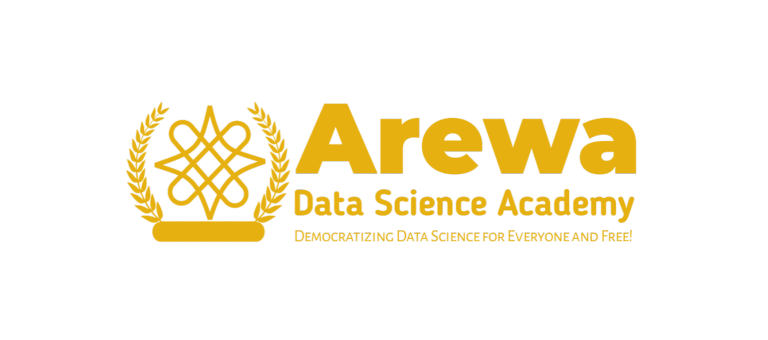

# ArewaDS Deep Learning with PyTorch Cohort 2.0
## Group 8 ArewaDS Capstone Project

* **Team Members:** Abubakar Abubakar Al-amin, Bernard Adjei Buckman, Halimat Musa, Kaloma Usman Majikumna

* **Mentor:** Engr. Bala Abduljalil

* **Project title:** Improving Binary Classification of Tomato Leaf Health in Northern Nigeria Using Transfer Learning on TomatoEbola Dataset.

This Notebook contains the codebase for our project titled **"Improving Binary Classification of Tomato Leaf Health in Northern Nigeria Using Transfer Learning on TomatoEbola Dataset"**. This work builds upon the foundational research titled [**Early Detection of Tomato Leaf Diseases using Transformers and Transfer Learning**](https://www.sciencedirect.com/science/article/pii/S1161030125001212) by H. A. Shehu, A. Ackley, M. Mark, and E. O. Eteng (2025), which pioneered the use of Vision Transformers (ViT) on the newly introduced "TomatoEbola" dataset. While that study achieved high accuracy, their inference time and lack of deployment limited practical use. Our project addresses these limitations by focusing on improving inference efficiency, model generalization, and real-world usability through fine-tuning lightweight pre-trained models such as MobileNetV3 and EfficientNet, and deploying the final model via a user-friendly web interface.

In [1]:
# Notebook Config

import sys
sys.path.append('/content/drive/MyDrive/Arewa_capstone_project')

In [2]:
# import setup_env for environment setup
from helpers import setup_env

setup_env()


GPU available
Reusing cached mean and std


Reusing cached mean and std
Dataset mean: tensor([0.5750, 0.6695, 0.5853]), std: tensor([0.2373, 0.1887, 0.3300])
Reusing cached mean and std


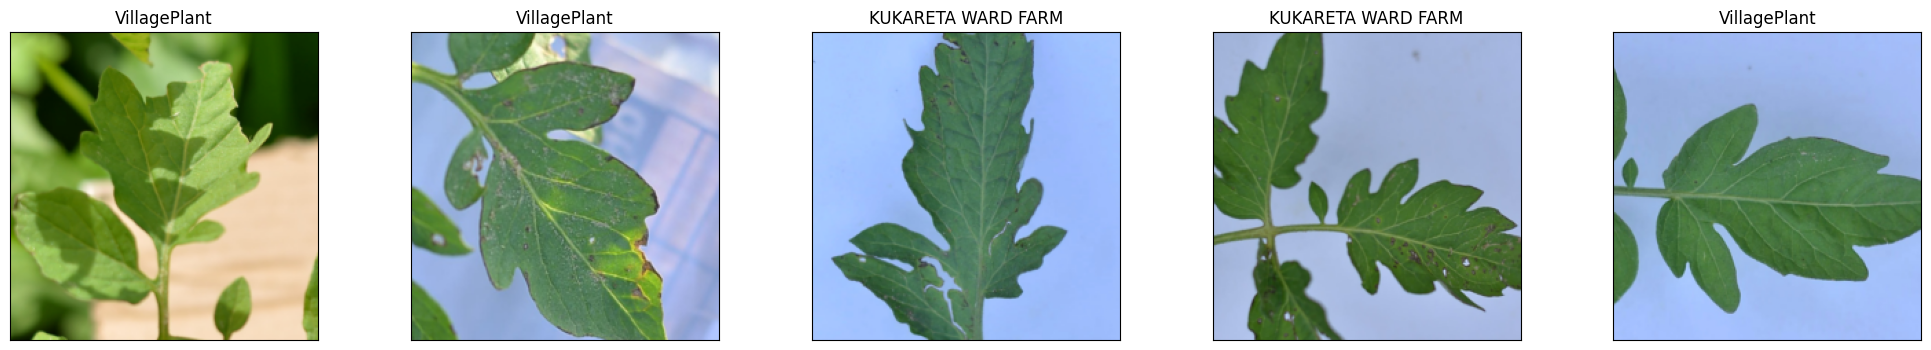

In [ ]:
# Viewing different leafs from each wards

%matplotlib inline
from helpers import get_data_location
from dataloader import visualize_one_batch, load_data
import multiprocessing
data_dir = get_data_location()
# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=multiprocessing.cpu_count() (all CPUs)
data_loaders, dataset_sizes, class_names  =  load_data(data_dir, batch_size = 5, valid_size = 0.1, num_workers = multiprocessing.cpu_count())

visualize_one_batch(data_loaders)

In [ ]:
#printing the mean and std.
#printing the distribution of the whole datasets combines all the three WARDS (PlantVillage) DIKUMAR, KASAISA and KUKARETA

from custom_visualization import load_data

batch_size = 32

dataloaders, dataset_sizes, class_names = load_data(
    data_dir="/content/drive/MyDrive/Arewa_capstone_project/dataset",
    batch_size=batch_size
)

# Print sizes
print("\n📊 Dataset sizes:")
print(f"Training set:   {dataset_sizes['train']} samples")
print(f"Validation set: {dataset_sizes['val']} samples")
print(f"Test set:       {dataset_sizes['test']} samples")
print(f"\n🧾 Class names: {class_names}")


Reusing cached mean and std
Dataset mean: tensor([0.5750, 0.6695, 0.5853]), std: tensor([0.2373, 0.1887, 0.3300])

📊 Dataset sizes:
Training set:   516 samples
Validation set: 64 samples
Test set:       66 samples

🧾 Class names: ['INFECTED', 'HEALTHY']


Reusing cached mean and std
Dataset mean: tensor([0.5750, 0.6695, 0.5853]), std: tensor([0.2373, 0.1887, 0.3300])
Reusing cached mean and std


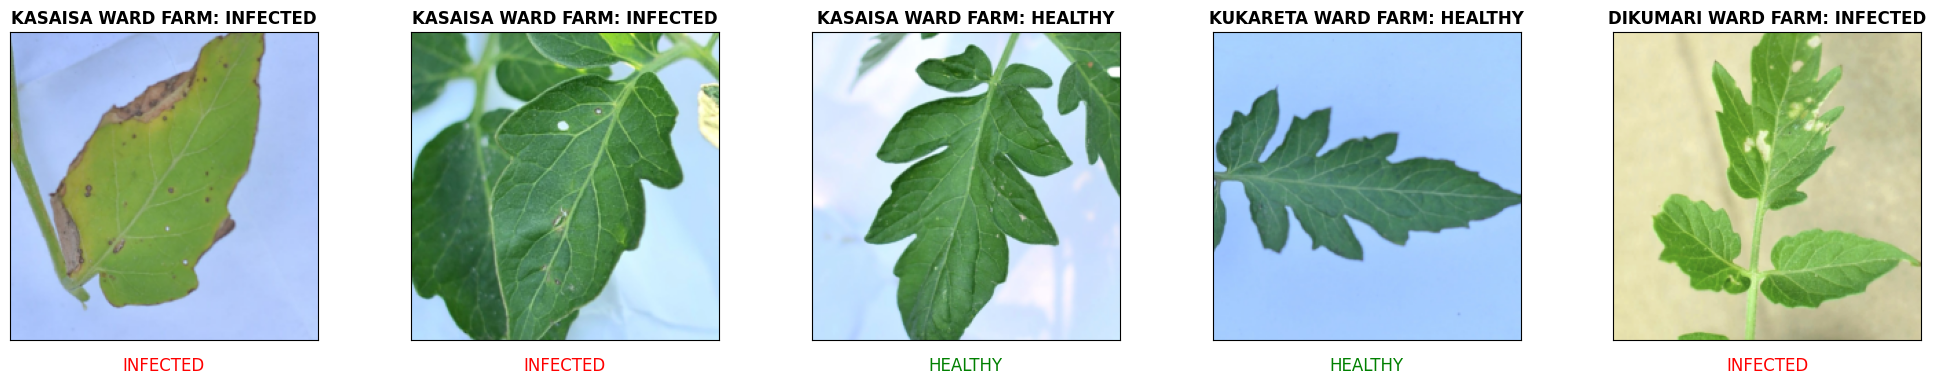

In [ ]:
#Visualizing data from infected and healthy leafs

%matplotlib inline
from helpers import get_data_location
from load import visualize_one_batch, load_data
import multiprocessing
data_dir = get_data_location(path = "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/DIKUMARI WARD FARM")
# use get_data_loaders to get the data_loaders dictionary. Use a batch_size
# of 5, a validation size of 0.01 and num_workers=multiprocessing.cpu_count() (all CPUs)
data_loaders, dataset_sizes, class_names  =  load_data(data_dir, batch_size = 5, valid_size = 0.1, num_workers = multiprocessing.cpu_count())

visualize_one_batch(data_loaders)

In [ ]:
#Reusing mean and std cached

from helpers import compute_mean_and_std
mean, std = compute_mean_and_std()
print(f"Dataset mean: {mean}, std: {std}")

Reusing cached mean and std
Dataset mean: tensor([0.5750, 0.6695, 0.5853]), std: tensor([0.2373, 0.1887, 0.3300])


# First Training Hyper- parameters

**Training ["vit_b_16", "resnet18", "mobilenet_v3", "efficientnet_b0"] Models on all the whole datasets combines all the three WARDS (PlantVillage) DIKUMAR, KASAISA and KUKARETA On the Below Hyperparameters**

DEVICE = torch.device("cuda" if torch.cuda is_available() else "cpu")

BATCH_SIZE = 32

NUM_EPOCHS = 25

LEARNING_RATE = 1e-4

WANDB_PROJECT =

"ArewaDS-Group-8-Capston-Project-On-Tomato-Transfer-Learning"

SAVE_DIR = "/content/drive/MyDrive/Arewa_capstone_project/"

OPTIMIZER = "Adam"

CRITERION = "CrossEntropyLoss"

DROPOUT_RATE = 0.3  # Applied to MobileNetV3 model

TRANSFORMS_TRAIN_PARAMETERS = {
  
    "RandomResizedCrop_size": 224,
    "RandomAffine_scale": (0.9, 1.1),
    "RandomAffine_translate": (0.1, 0.1),
    "RandomAffine_degrees": 10,
    "RandomAffine_fill": 0,
    "RandomHorizontalFlip_p": 0.5,
    "RandomCrop_size": 224,
    "RandomCrop_padding_mode": "reflect",
    "ColorJitter_brightness": 0.5,
    "ColorJitter_contrast": 0.5,
    "ColorJitter_saturation": 0.5,
    "ColorJitter_hue": 0.5
}


TRANSFORMS_VAL_TEST_PARAMETERS = {

    "Resize_size": 256,

    "CenterCrop_size": 224

}



DATASET_SPLIT_RATIO = {

    "validation": 0.2,

    "training": 0.8
     # Inferred from the 0.2 * len(full_dataset) split
}


# Models Training


📦 Training vit_b_16 on Dikumari dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
wandb: Currently logged in as: abubakaralamin100 (abubakaralamin100-gombe-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch 1/25: 100%|██████████| 3/3 [00:16<00:00,  5.60s/it]



✅ Saved Best Model for vit_b_16_Dikumari with Val Acc: 50.00%



Epoch 2/25: 100%|██████████| 3/3 [00:04<00:00,  1.59s/it]



✅ Saved Best Model for vit_b_16_Dikumari with Val Acc: 60.00%



Epoch 4/25: 100%|██████████| 3/3 [00:04<00:00,  1.63s/it]



✅ Saved Best Model for vit_b_16_Dikumari with Val Acc: 70.00%



Epoch 25/25: 100%|██████████| 3/3 [00:04<00:00,  1.64s/it]


Final Metrics for vit_b_16_Dikumari → Acc: 0.60, F1: 0.60, AUC: 0.6483516483516484


🏁 Finished vit_b_16_Dikumari | Best Val Acc: 70.00%


📦 Training vit_b_16 on Kasaisa dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 4/4 [00:32<00:00,  8.02s/it]



✅ Saved Best Model for vit_b_16_Kasaisa with Val Acc: 75.00%



Epoch 2/25: 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]



✅ Saved Best Model for vit_b_16_Kasaisa with Val Acc: 83.33%



Epoch 3/25: 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]



✅ Saved Best Model for vit_b_16_Kasaisa with Val Acc: 87.50%



Epoch 7/25: 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]



✅ Saved Best Model for vit_b_16_Kasaisa with Val Acc: 95.83%



Epoch 25/25: 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]


Final Metrics for vit_b_16_Kasaisa → Acc: 0.92, F1: 0.92, AUC: 0.9375


🏁 Finished vit_b_16_Kasaisa | Best Val Acc: 95.83%


📦 Training vit_b_16 on Kukareta dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 3/3 [00:30<00:00, 10.16s/it]



✅ Saved Best Model for vit_b_16_Kukareta with Val Acc: 60.00%



Epoch 3/25: 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]



✅ Saved Best Model for vit_b_16_Kukareta with Val Acc: 70.00%



Epoch 25/25: 100%|██████████| 3/3 [00:03<00:00,  1.30s/it]


Final Metrics for vit_b_16_Kukareta → Acc: 0.55, F1: 0.54, AUC: 0.6593406593406593


🏁 Finished vit_b_16_Kukareta | Best Val Acc: 70.00%


📦 Training vit_b_16 on Combined dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 8/8 [00:45<00:00,  5.68s/it]



✅ Saved Best Model for vit_b_16_Combined with Val Acc: 71.88%



Epoch 2/25: 100%|██████████| 8/8 [00:13<00:00,  1.67s/it]



✅ Saved Best Model for vit_b_16_Combined with Val Acc: 78.12%



Epoch 3/25: 100%|██████████| 8/8 [00:16<00:00,  2.01s/it]



✅ Saved Best Model for vit_b_16_Combined with Val Acc: 81.25%



Epoch 9/25: 100%|██████████| 8/8 [00:11<00:00,  1.50s/it]



✅ Saved Best Model for vit_b_16_Combined with Val Acc: 82.81%



Epoch 25/25: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Final Metrics for vit_b_16_Combined → Acc: 0.81, F1: 0.81, AUC: 0.8928571428571429


🏁 Finished vit_b_16_Combined | Best Val Acc: 82.81%


📦 Training resnet18 on Dikumari dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]


Epoch 1/25: 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]



✅ Saved Best Model for resnet18_Dikumari with Val Acc: 50.00%



Epoch 2/25: 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]



✅ Saved Best Model for resnet18_Dikumari with Val Acc: 55.00%



Epoch 3/25: 100%|██████████| 3/3 [00:03<00:00,  1.24s/it]



✅ Saved Best Model for resnet18_Dikumari with Val Acc: 60.00%



Epoch 4/25: 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]



✅ Saved Best Model for resnet18_Dikumari with Val Acc: 80.00%



Epoch 25/25: 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]


Final Metrics for resnet18_Dikumari → Acc: 0.70, F1: 0.70, AUC: 0.875


🏁 Finished resnet18_Dikumari | Best Val Acc: 80.00%


📦 Training resnet18 on Kasaisa dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]



✅ Saved Best Model for resnet18_Kasaisa with Val Acc: 75.00%



Epoch 5/25: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]



✅ Saved Best Model for resnet18_Kasaisa with Val Acc: 83.33%



Epoch 25/25: 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]


Final Metrics for resnet18_Kasaisa → Acc: 0.83, F1: 0.83, AUC: 0.9285714285714286


🏁 Finished resnet18_Kasaisa | Best Val Acc: 83.33%


📦 Training resnet18 on Kukareta dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]



✅ Saved Best Model for resnet18_Kukareta with Val Acc: 55.00%



Epoch 2/25: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]



✅ Saved Best Model for resnet18_Kukareta with Val Acc: 65.00%



Epoch 4/25: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]



✅ Saved Best Model for resnet18_Kukareta with Val Acc: 75.00%



Epoch 5/25: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]



✅ Saved Best Model for resnet18_Kukareta with Val Acc: 80.00%



Epoch 25/25: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


Final Metrics for resnet18_Kukareta → Acc: 0.75, F1: 0.74, AUC: 0.7916666666666666


🏁 Finished resnet18_Kukareta | Best Val Acc: 80.00%


📦 Training resnet18 on Combined dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]



✅ Saved Best Model for resnet18_Combined with Val Acc: 75.00%



Epoch 2/25: 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]



✅ Saved Best Model for resnet18_Combined with Val Acc: 84.38%



Epoch 3/25: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]



✅ Saved Best Model for resnet18_Combined with Val Acc: 85.94%



Epoch 5/25: 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]



✅ Saved Best Model for resnet18_Combined with Val Acc: 87.50%



Epoch 25/25: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]


Final Metrics for resnet18_Combined → Acc: 0.84, F1: 0.84, AUC: 0.9428571428571428


🏁 Finished resnet18_Combined | Best Val Acc: 87.50%


📦 Training mobilenet_v3 on Dikumari dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 104MB/s]


Epoch 1/25: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]



✅ Saved Best Model for mobilenet_v3_Dikumari with Val Acc: 50.00%



Epoch 2/25: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]



✅ Saved Best Model for mobilenet_v3_Dikumari with Val Acc: 60.00%



Epoch 4/25: 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]



✅ Saved Best Model for mobilenet_v3_Dikumari with Val Acc: 65.00%



Epoch 11/25: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]



✅ Saved Best Model for mobilenet_v3_Dikumari with Val Acc: 70.00%



Epoch 25/25: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]


Final Metrics for mobilenet_v3_Dikumari → Acc: 0.60, F1: 0.58, AUC: 0.7474747474747474


🏁 Finished mobilenet_v3_Dikumari | Best Val Acc: 70.00%


📦 Training mobilenet_v3 on Kasaisa dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 4/4 [00:01<00:00,  2.40it/s]



✅ Saved Best Model for mobilenet_v3_Kasaisa with Val Acc: 58.33%



Epoch 2/25: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]



✅ Saved Best Model for mobilenet_v3_Kasaisa with Val Acc: 62.50%



Epoch 3/25: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]



✅ Saved Best Model for mobilenet_v3_Kasaisa with Val Acc: 66.67%



Epoch 9/25: 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]



✅ Saved Best Model for mobilenet_v3_Kasaisa with Val Acc: 70.83%



Epoch 19/25: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]



✅ Saved Best Model for mobilenet_v3_Kasaisa with Val Acc: 75.00%



Epoch 23/25: 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]



✅ Saved Best Model for mobilenet_v3_Kasaisa with Val Acc: 79.17%



Epoch 25/25: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


Final Metrics for mobilenet_v3_Kasaisa → Acc: 0.79, F1: 0.79, AUC: 0.859375


🏁 Finished mobilenet_v3_Kasaisa | Best Val Acc: 79.17%


📦 Training mobilenet_v3 on Kukareta dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]



✅ Saved Best Model for mobilenet_v3_Kukareta with Val Acc: 65.00%



Epoch 7/25: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]



✅ Saved Best Model for mobilenet_v3_Kukareta with Val Acc: 70.00%



Epoch 25/25: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]


Final Metrics for mobilenet_v3_Kukareta → Acc: 0.65, F1: 0.63, AUC: 0.81


🏁 Finished mobilenet_v3_Kukareta | Best Val Acc: 70.00%


📦 Training mobilenet_v3 on Combined dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 8/8 [00:05<00:00,  1.56it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 71.88%



Epoch 2/25: 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 75.00%



Epoch 8/25: 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 76.56%



Epoch 11/25: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 78.12%



Epoch 12/25: 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 79.69%



Epoch 13/25: 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 82.81%



Epoch 15/25: 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 84.38%



Epoch 16/25: 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]



✅ Saved Best Model for mobilenet_v3_Combined with Val Acc: 85.94%



Epoch 25/25: 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


Final Metrics for mobilenet_v3_Combined → Acc: 0.84, F1: 0.84, AUC: 0.8993157380254155


🏁 Finished mobilenet_v3_Combined | Best Val Acc: 85.94%


📦 Training efficientnet_b0 on Dikumari dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 80.5MB/s]


Epoch 1/25: 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]



✅ Saved Best Model for efficientnet_b0_Dikumari with Val Acc: 65.00%



Epoch 3/25: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]



✅ Saved Best Model for efficientnet_b0_Dikumari with Val Acc: 70.00%



Epoch 4/25: 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]



✅ Saved Best Model for efficientnet_b0_Dikumari with Val Acc: 75.00%



Epoch 25/25: 100%|██████████| 3/3 [00:02<00:00,  1.19it/s]


Final Metrics for efficientnet_b0_Dikumari → Acc: 0.70, F1: 0.67, AUC: 0.7802197802197802


🏁 Finished efficientnet_b0_Dikumari | Best Val Acc: 75.00%


📦 Training efficientnet_b0 on Kasaisa dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]



✅ Saved Best Model for efficientnet_b0_Kasaisa with Val Acc: 75.00%



Epoch 2/25: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]



✅ Saved Best Model for efficientnet_b0_Kasaisa with Val Acc: 79.17%



Epoch 14/25: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]



✅ Saved Best Model for efficientnet_b0_Kasaisa with Val Acc: 87.50%



Epoch 25/25: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


Final Metrics for efficientnet_b0_Kasaisa → Acc: 0.83, F1: 0.83, AUC: 0.953125


🏁 Finished efficientnet_b0_Kasaisa | Best Val Acc: 87.50%


📦 Training efficientnet_b0 on Kukareta dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]



✅ Saved Best Model for efficientnet_b0_Kukareta with Val Acc: 40.00%



Epoch 2/25: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]



✅ Saved Best Model for efficientnet_b0_Kukareta with Val Acc: 60.00%



Epoch 3/25: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]



✅ Saved Best Model for efficientnet_b0_Kukareta with Val Acc: 70.00%



Epoch 6/25: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]



✅ Saved Best Model for efficientnet_b0_Kukareta with Val Acc: 80.00%



Epoch 12/25: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]



✅ Saved Best Model for efficientnet_b0_Kukareta with Val Acc: 85.00%



Epoch 25/25: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]


Final Metrics for efficientnet_b0_Kukareta → Acc: 0.80, F1: 0.76, AUC: 0.8214285714285714


🏁 Finished efficientnet_b0_Kukareta | Best Val Acc: 85.00%


📦 Training efficientnet_b0 on Combined dataset
Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25: 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]



✅ Saved Best Model for efficientnet_b0_Combined with Val Acc: 73.44%



Epoch 8/25: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]



✅ Saved Best Model for efficientnet_b0_Combined with Val Acc: 75.00%



Epoch 16/25: 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]



✅ Saved Best Model for efficientnet_b0_Combined with Val Acc: 76.56%



Epoch 19/25: 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]



✅ Saved Best Model for efficientnet_b0_Combined with Val Acc: 78.12%



Epoch 24/25: 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]



✅ Saved Best Model for efficientnet_b0_Combined with Val Acc: 79.69%



Epoch 25/25: 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]


Final Metrics for efficientnet_b0_Combined → Acc: 0.80, F1: 0.79, AUC: 0.855327468230694


🏁 Finished efficientnet_b0_Combined | Best Val Acc: 79.69%

📊 Results saved to all_model_results.csv


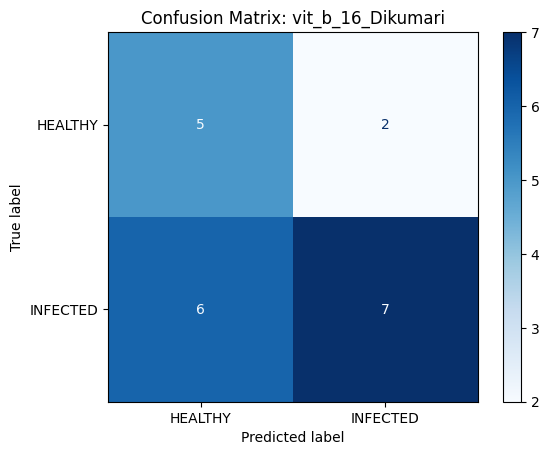

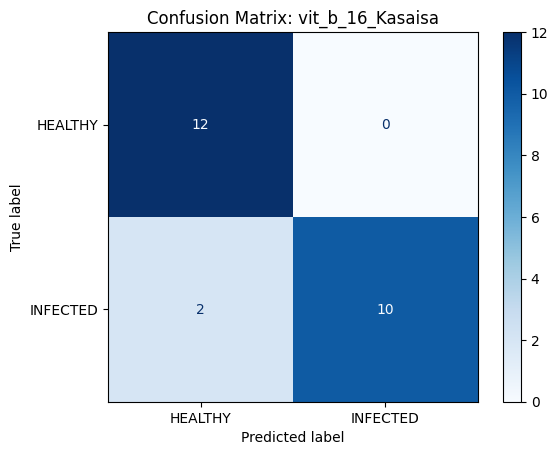

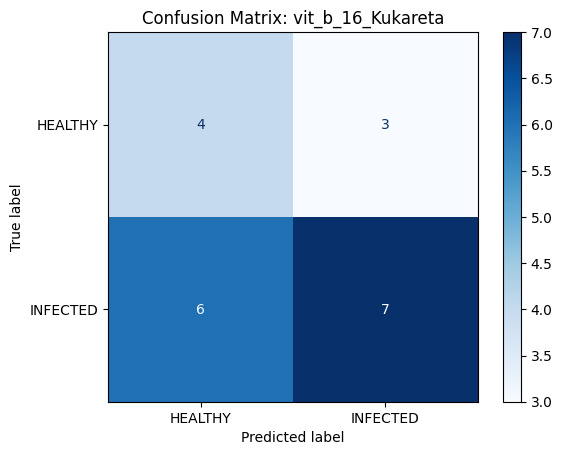

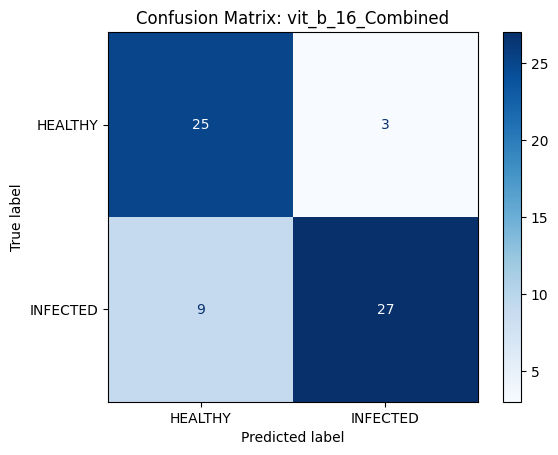

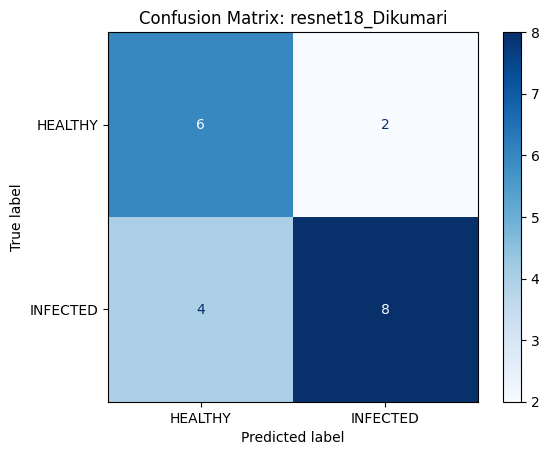

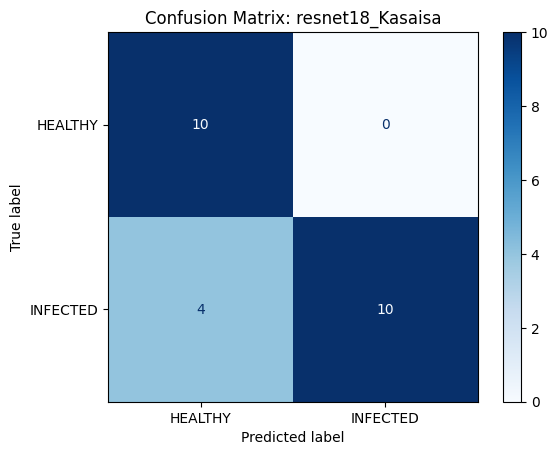

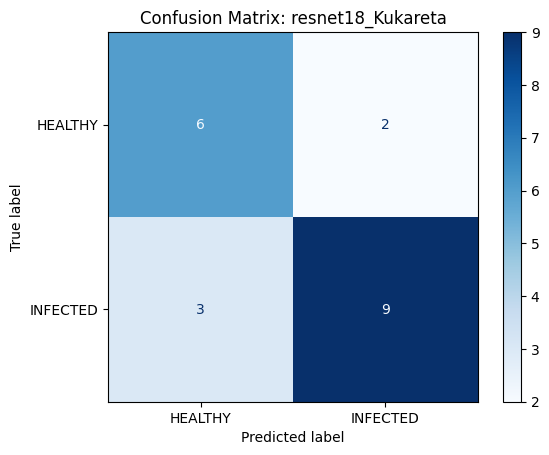

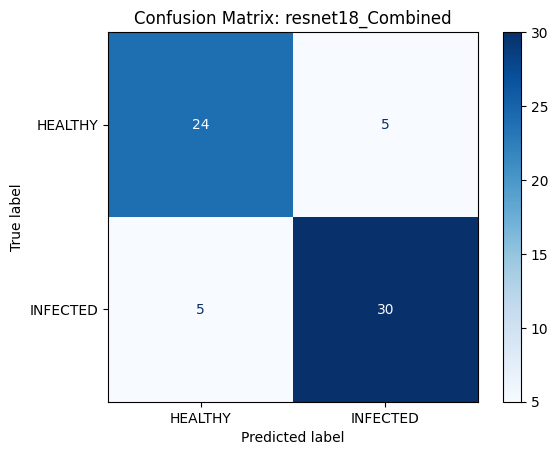

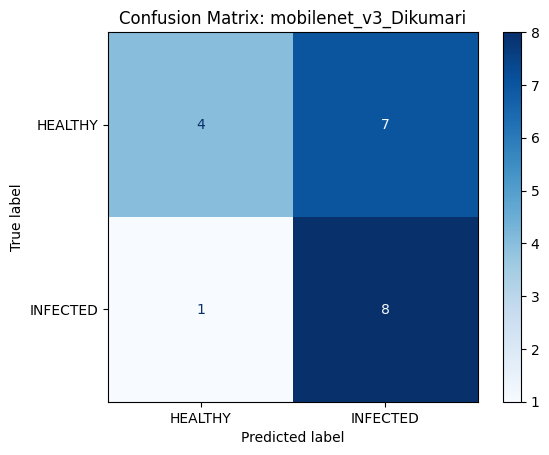

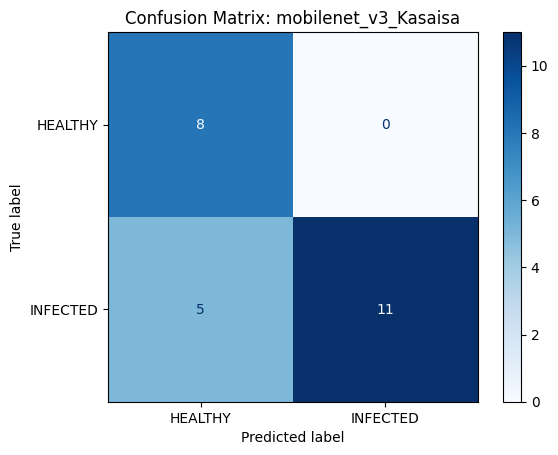

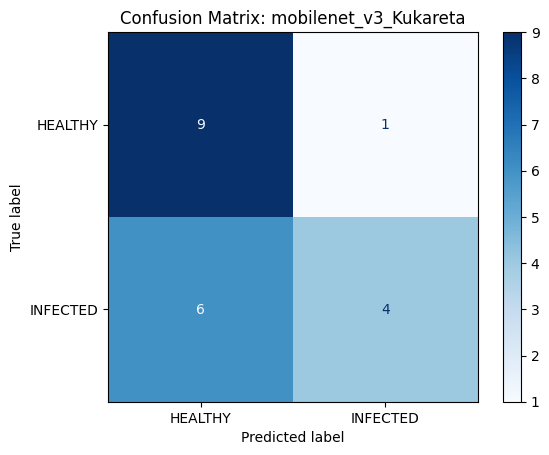

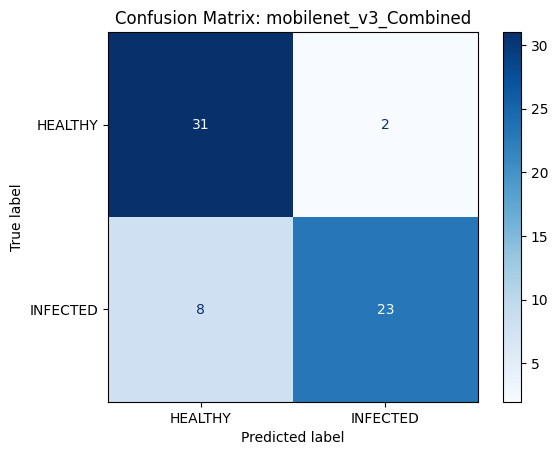

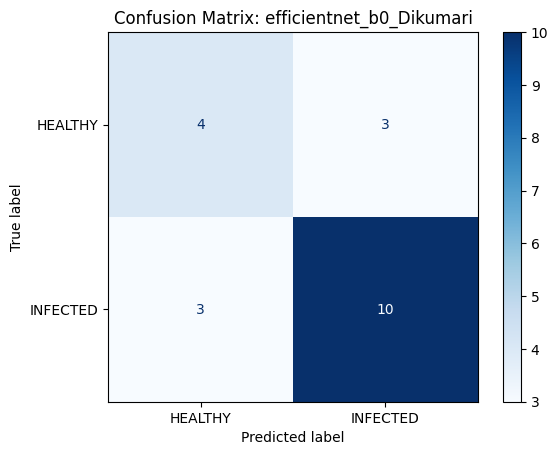

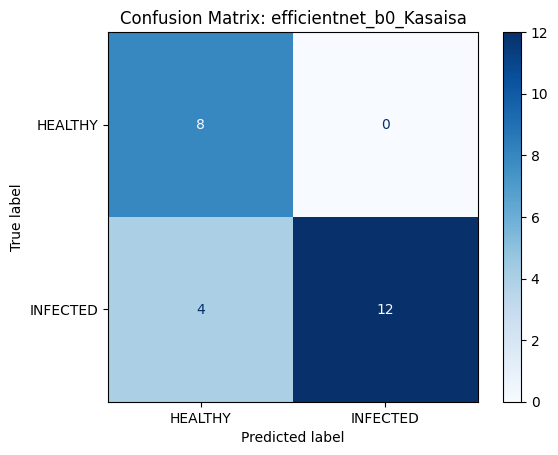

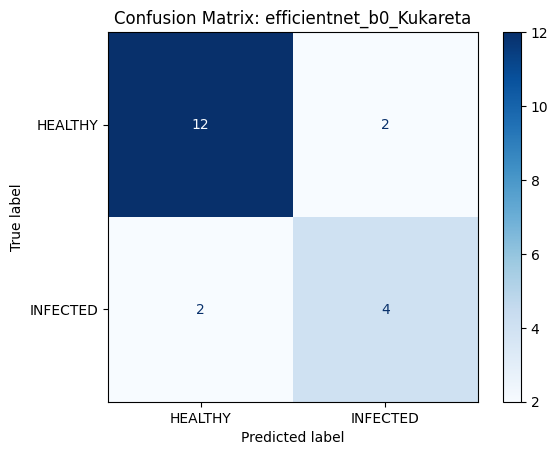

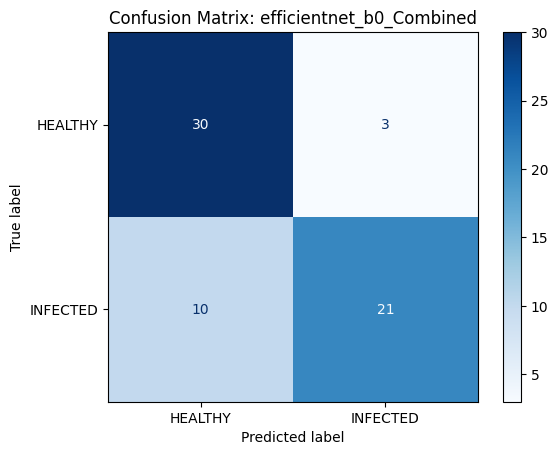

In [ ]:
from train_transfer_learning import *
from vit_model import ViTBase
from resnet_model import ResNetBase
from efficientnet_model import EfficientNetB0
from mobilenetv3 import MobileNetV3


if __name__ == '__main__':
    datasets_paths = {
        "Dikumari": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/DIKUMARI WARD FARM",
        "Kasaisa": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KASAISA WARD FARM",
        "Kukareta": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KUKARETA WARD FARM",
        "Combined": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/VillagePlant"
    }

    model_names = ["vit_b_16", "resnet18", "mobilenet_v3", "efficientnet_b0"]

    results = []

    for model_name in model_names:
        for label, path in datasets_paths.items():
            print(f"\n📦 Training {model_name} on {label} dataset")
            train_loader, val_loader, class_names = get_dataloaders(path)
            model = build_model(model_name, num_classes=len(class_names))
            run_name = f"{model_name}_{label}"
            best_acc = train_and_evaluate(model, train_loader, val_loader, model_name, label, run_name, results)
            print(f"🏁 Finished {run_name} | Best Val Acc: {best_acc:.2f}%\n")

    # Save results summary to CSV
    results_df = pd.DataFrame(results)
    results_df.to_csv(os.path.join(SAVE_DIR, "all_model_results.csv"), index=False)
    print("📊 Results saved to all_model_results.csv")


# Training Summary

In [ ]:
import pandas as pd

first_training_results_summary = pd.read_csv("/content/drive/MyDrive/Arewa_capstone_project/all_model_results.csv")
first_training_results_summary

Run            Model   Dataset  Accuracy  F1 Score  \
0          vit_b_16_Dikumari         vit_b_16  Dikumari  0.600000  0.595960   
1           vit_b_16_Kasaisa         vit_b_16   Kasaisa  0.916667  0.916084   
2          vit_b_16_Kukareta         vit_b_16  Kukareta  0.550000  0.539642   
3          vit_b_16_Combined         vit_b_16  Combined  0.812500  0.812317   
4          resnet18_Dikumari         resnet18  Dikumari  0.700000  0.696970   
5           resnet18_Kasaisa         resnet18   Kasaisa  0.833333  0.833333   
6          resnet18_Kukareta         resnet18  Kukareta  0.750000  0.744246   
7          resnet18_Combined         resnet18  Combined  0.843750  0.842365   
8      mobilenet_v3_Dikumari     mobilenet_v3  Dikumari  0.600000  0.583333   
9       mobilenet_v3_Kasaisa     mobilenet_v3   Kasaisa  0.791667  0.788360   
10     mobilenet_v3_Kukareta     mobilenet_v3  Kukareta  0.650000  0.626667   
11     mobilenet_v3_Combined     mobilenet_v3  Combined  0.843750  0.841270   
12  efficientnet_b0_Dikumari  efficientnet_b0  Dikumari  0.700000  0.670330   
13   efficientnet_b0_Kasaisa  efficientnet_b0   Kasaisa  0.833333  0.828571   
14  efficientnet_b0_Kukareta  efficientnet_b0  Kukareta  0.800000  0.761905   
15  efficientnet_b0_Combined  efficientnet_b0  Combined  0.796875  0.792777   

     ROC AUC  
0   0.648352  
1   0.937500  
2   0.659341  
3   0.892857  
4   0.875000  
5   0.928571  
6   0.791667  
7   0.942857  
8   0.747475  
9   0.859375  
10  0.810000  
11  0.899316  
12  0.780220  
13  0.953125  
14  0.821429  
15  0.855327

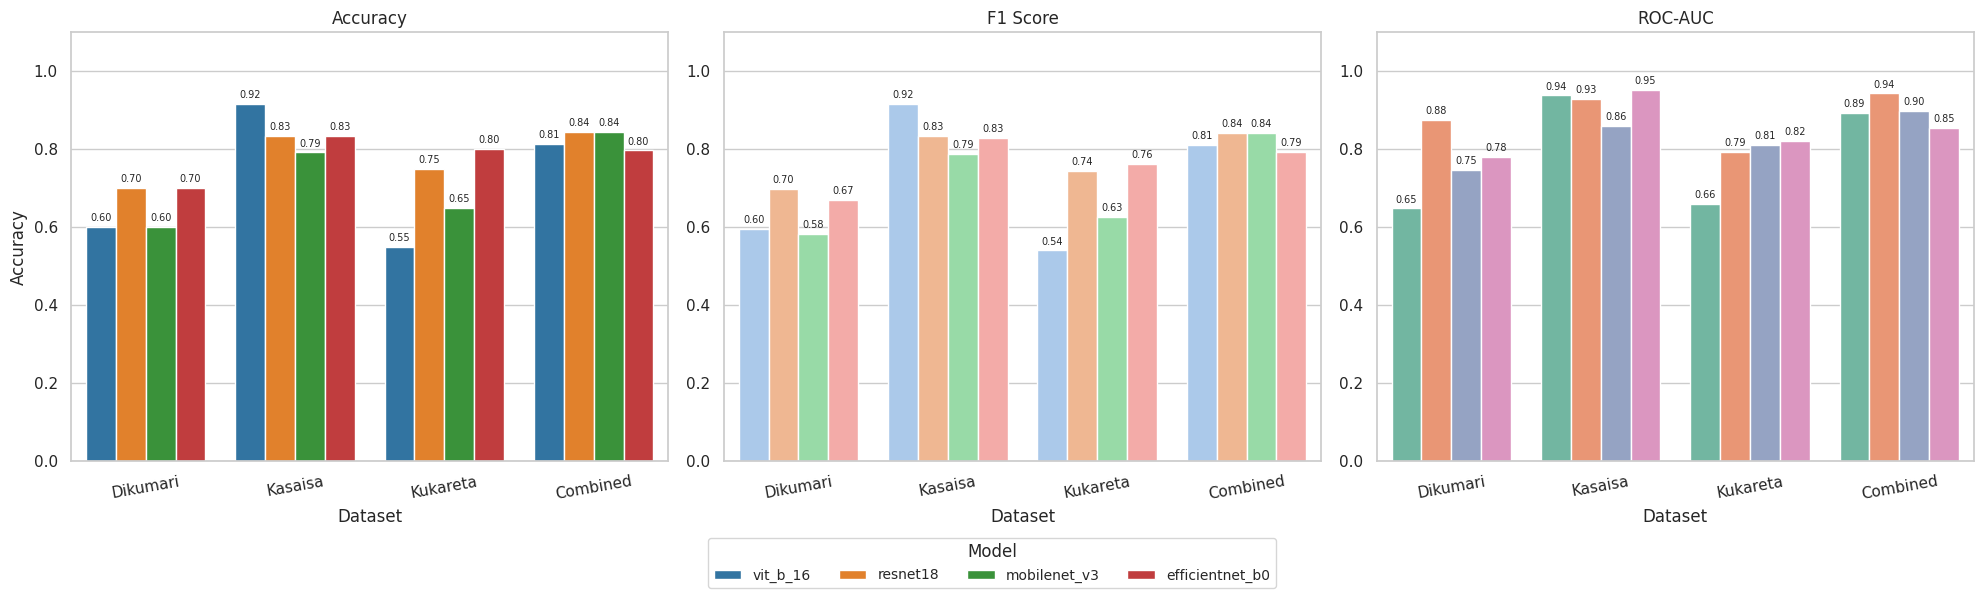

✅ First training summary plot saved to:
/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/first_run_metrics_summary.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Load your first-run results ===
df = pd.DataFrame({
    "Run": [
        "vit_b_16_Dikumari", "vit_b_16_Kasaisa", "vit_b_16_Kukareta", "vit_b_16_Combined",
        "resnet18_Dikumari", "resnet18_Kasaisa", "resnet18_Kukareta", "resnet18_Combined",
        "mobilenet_v3_Dikumari", "mobilenet_v3_Kasaisa", "mobilenet_v3_Kukareta", "mobilenet_v3_Combined",
        "efficientnet_b0_Dikumari", "efficientnet_b0_Kasaisa", "efficientnet_b0_Kukareta", "efficientnet_b0_Combined"
    ],
    "Model": [
        "vit_b_16", "vit_b_16", "vit_b_16", "vit_b_16",
        "resnet18", "resnet18", "resnet18", "resnet18",
        "mobilenet_v3", "mobilenet_v3", "mobilenet_v3", "mobilenet_v3",
        "efficientnet_b0", "efficientnet_b0", "efficientnet_b0", "efficientnet_b0"
    ],
    "Dataset": [
        "Dikumari", "Kasaisa", "Kukareta", "Combined",
        "Dikumari", "Kasaisa", "Kukareta", "Combined",
        "Dikumari", "Kasaisa", "Kukareta", "Combined",
        "Dikumari", "Kasaisa", "Kukareta", "Combined"
    ],
    "Accuracy": [
        0.60, 0.916667, 0.55, 0.8125,
        0.70, 0.833333, 0.75, 0.84375,
        0.60, 0.791667, 0.65, 0.84375,
        0.70, 0.833333, 0.80, 0.796875
    ],
    "F1 Score": [
        0.596, 0.916, 0.540, 0.812,
        0.697, 0.833, 0.744, 0.842,
        0.583, 0.788, 0.627, 0.841,
        0.670, 0.829, 0.762, 0.793
    ],
    "ROC AUC": [
        0.648, 0.938, 0.659, 0.893,
        0.875, 0.929, 0.792, 0.943,
        0.747, 0.859, 0.810, 0.899,
        0.780, 0.953, 0.821, 0.855
    ]
})

# === Helper to annotate bars
def annotate_bars(ax, values, fmt="%.2f", offset=0.01):
    for bar, val in zip(ax.patches, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + offset,
            fmt % val,
            ha="center", va="bottom", fontsize=7
        )

# === Plot
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

# 📈 Accuracy
sns.barplot(data=df, x="Dataset", y="Accuracy", hue="Model", ax=axes[0], palette="tab10")
annotate_bars(axes[0], df["Accuracy"], fmt="%.2f", offset=0.01)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0, 1.1)
axes[0].set_ylabel("Accuracy")

# 🎯 F1
sns.barplot(data=df, x="Dataset", y="F1 Score", hue="Model", ax=axes[1], palette="pastel")
annotate_bars(axes[1], df["F1 Score"], fmt="%.2f", offset=0.01)
axes[1].set_title("F1 Score")
axes[1].set_ylim(0, 1.1)
axes[1].set_ylabel("")

# 🚀 AUC
sns.barplot(data=df, x="Dataset", y="ROC AUC", hue="Model", ax=axes[2], palette="Set2")
annotate_bars(axes[2], df["ROC AUC"], fmt="%.2f", offset=0.01)
axes[2].set_title("ROC-AUC")
axes[2].set_ylim(0, 1.1)
axes[2].set_ylabel("")

# Cleanup
for ax in axes:
    ax.tick_params(axis='x', rotation=10)
    ax.get_legend().remove()

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(labels), fontsize=10, title="Model")

plt.tight_layout(rect=[0, 0.08, 1, 1])
save_path = "/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/first_run_metrics_summary.png"
plt.savefig(save_path)
plt.show()

print(f"✅ First training summary plot saved to:\n{save_path}")


# Models testing

In [ ]:
from test_models import *
run_tests()

❌ Model not found: /content/drive/MyDrive/Arewa_capstone_project/best_model_vit_base_Dikumari.pth
❌ Model not found: /content/drive/MyDrive/Arewa_capstone_project/best_model_vit_base_Kasaisa.pth
❌ Model not found: /content/drive/MyDrive/Arewa_capstone_project/best_model_vit_base_Kukareta.pth
❌ Model not found: /content/drive/MyDrive/Arewa_capstone_project/best_model_vit_base_Combined.pth


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested resnet18 on Dikumari → Acc: 0.53, F1: 0.53, AUC: 0.5247058823529411


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested resnet18 on Kasaisa → Acc: 0.55, F1: 0.55, AUC: 0.562912087912088


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested resnet18 on Kukareta → Acc: 0.42, F1: 0.42, AUC: 0.3822641509433962


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested resnet18 on Combined → Acc: 0.50, F1: 0.50, AUC: 0.4695332080200501


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested mobilenet_v3 on Dikumari → Acc: 0.50, F1: 0.49, AUC: 0.46784313725490195


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested mobilenet_v3 on Kasaisa → Acc: 0.52, F1: 0.51, AUC: 0.46263736263736266


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested mobilenet_v3 on Kukareta → Acc: 0.48, F1: 0.48, AUC: 0.4841509433962264


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested mobilenet_v3 on Combined → Acc: 0.53, F1: 0.51, AUC: 0.5234179197994987


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested efficientnet_b0 on Dikumari → Acc: 0.46, F1: 0.43, AUC: 0.43450980392156857


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested efficientnet_b0 on Kasaisa → Acc: 0.52, F1: 0.50, AUC: 0.5337912087912089


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested efficientnet_b0 on Kukareta → Acc: 0.57, F1: 0.56, AUC: 0.6173584905660378


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested efficientnet_b0 on Combined → Acc: 0.47, F1: 0.46, AUC: 0.4850015664160401
📊 Test results saved to test_model_results.csv


In [ ]:
import os
import torch
from test_models import load_test_loader, load_model, evaluate_model

# === Setup ===
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name = "vit_base"
train_label = "Combined"  # The ward it was trained on
model_path = f"/content/drive/MyDrive/Arewa_capstone_project/best_model_{model_name}_{train_label}.pth"

# === Paths to all test datasets ===
datasets_paths =datasets_paths = {
        "Dikumari": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/DIKUMARI WARD FARM",
        "Kasaisa": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KASAISA WARD FARM",
        "Kukareta": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KUKARETA WARD FARM",
        "Combined": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/VillagePlant"
    }

# === Test on all datasets using the ViT model ===
for test_label, test_path in datasets_paths.items():
    test_loader, class_names = load_test_loader(test_path)
    model = load_model(model_name, num_classes=len(class_names), weights_path=model_path)
    run_name = f"{model_name}_{train_label}_tested_on_{test_label}"

    acc, f1, auc = evaluate_model(model, test_loader, class_names, run_name)

    print(f"✅ Tested ViT ({train_label}) on {test_label} → "
          f"Accuracy = {acc:.2f}, F1 = {f1:.2f}, AUC = {auc if auc else 'N/A'}")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested ViT (Combined) on Dikumari → Accuracy = 0.47, F1 = 0.38, AUC = 0.4443137254901961


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested ViT (Combined) on Kasaisa → Accuracy = 0.56, F1 = 0.54, AUC = 0.6225274725274726


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested ViT (Combined) on Kukareta → Accuracy = 0.59, F1 = 0.59, AUC = 0.5218867924528302


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


✅ Tested ViT (Combined) on Combined → Accuracy = 0.47, F1 = 0.42, AUC = 0.5118264411027569


# Test results summary and plot

In [ ]:
first_test_results_summary = pd.read_csv("/content/drive/MyDrive/Arewa_capstone_project/test_model_results.csv")
first_test_results_summary

Model Test Dataset  Accuracy  F1 Score   ROC AUC
0          resnet18     Dikumari  0.514851  0.434852  0.469412
1          resnet18      Kasaisa  0.483607  0.480781  0.503022
2          resnet18     Kukareta  0.582524  0.576780  0.552830
3          resnet18     Combined  0.493750  0.491346  0.502937
4      mobilenet_v3     Dikumari  0.514851  0.511788  0.503137
5      mobilenet_v3      Kasaisa  0.434426  0.427931  0.465110
6      mobilenet_v3     Kukareta  0.533981  0.531818  0.483396
7      mobilenet_v3     Combined  0.521875  0.516086  0.537085
8   efficientnet_b0     Dikumari  0.465347  0.456340  0.432941
9   efficientnet_b0      Kasaisa  0.500000  0.478084  0.588462
10  efficientnet_b0     Kukareta  0.427184  0.427184  0.446415
11  efficientnet_b0     Combined  0.515625  0.501963  0.497024

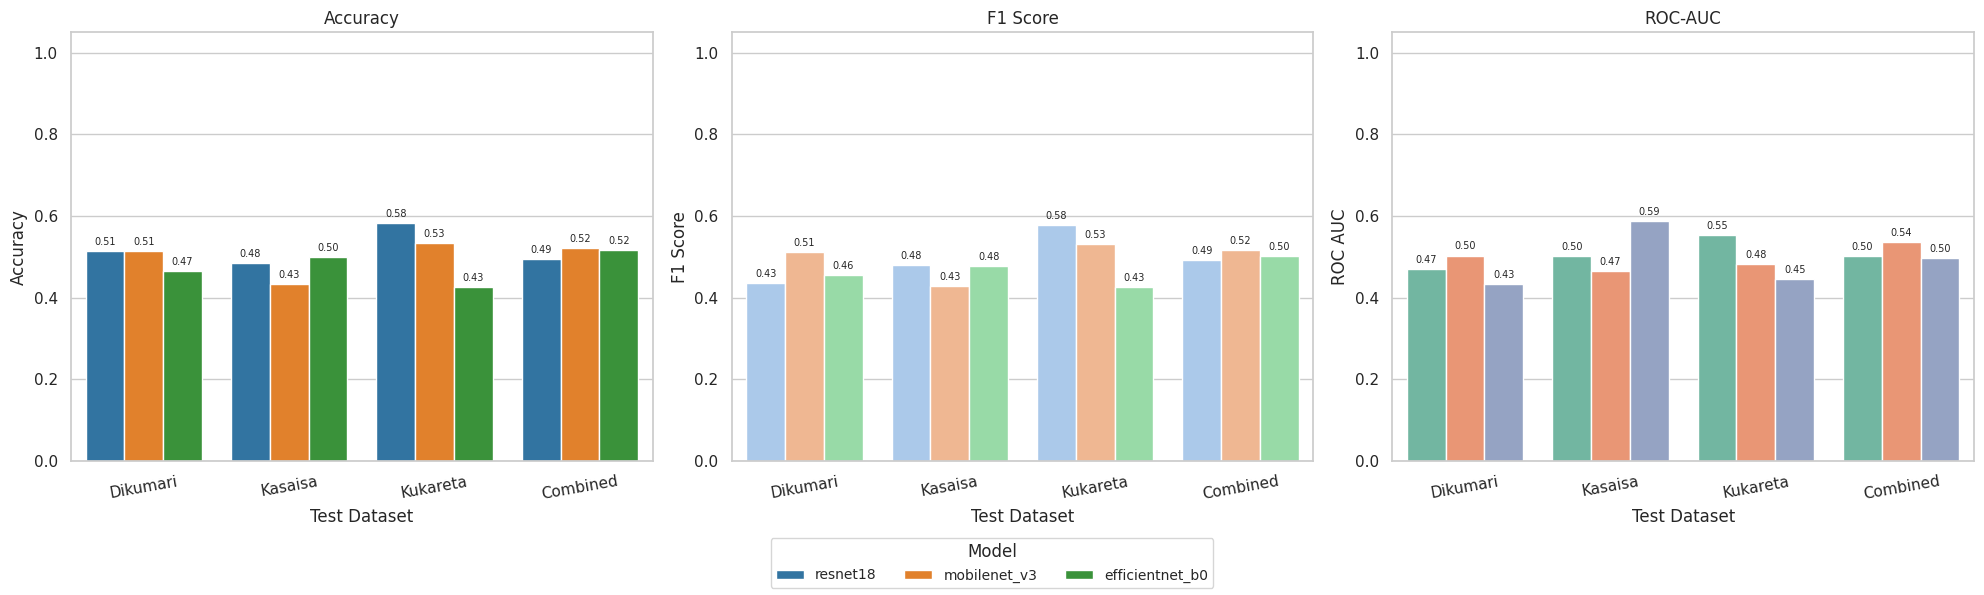

✅ First training summary plot saved to:
/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/first_run_metrics_summary.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the first test summary data
df_test_summary = pd.DataFrame({
    "Model": [
        "resnet18", "resnet18", "resnet18", "resnet18",
        "mobilenet_v3", "mobilenet_v3", "mobilenet_v3", "mobilenet_v3",
        "efficientnet_b0", "efficientnet_b0", "efficientnet_b0", "efficientnet_b0"
    ],
    "Test Dataset": [
        "Dikumari", "Kasaisa", "Kukareta", "Combined",
        "Dikumari", "Kasaisa", "Kukareta", "Combined",
        "Dikumari", "Kasaisa", "Kukareta", "Combined"
    ],
    "Accuracy": [
        0.514851, 0.483607, 0.582524, 0.493750,
        0.514851, 0.434426, 0.533981, 0.521875,
        0.465347, 0.500000, 0.427184, 0.515625
    ],
    "F1 Score": [
        0.434852, 0.480781, 0.576780, 0.491346,
        0.511788, 0.427931, 0.531818, 0.516086,
        0.456340, 0.478084, 0.427184, 0.501963
    ],
    "ROC AUC": [
        0.469412, 0.503022, 0.552830, 0.502937,
        0.503137, 0.465110, 0.483396, 0.537085,
        0.432941, 0.588462, 0.446415, 0.497024
    ]
})

# Function to annotate bars
def annotate_bars(ax, values, fmt="%.2f", offset=0.01):
    for bar, val in zip(ax.patches, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + offset,
            fmt % val,
            ha="center", va="bottom", fontsize=7
        )

# Plotting
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

# Accuracy
sns.barplot(data=df_test_summary, x="Test Dataset", y="Accuracy", hue="Model", ax=axes[0], palette="tab10")
annotate_bars(axes[0], df_test_summary["Accuracy"], fmt="%.2f", offset=0.01)
axes[0].set_title("Accuracy")
axes[0].set_ylim(0, 1.05)

# F1 Score
sns.barplot(data=df_test_summary, x="Test Dataset", y="F1 Score", hue="Model", ax=axes[1], palette="pastel")
annotate_bars(axes[1], df_test_summary["F1 Score"], fmt="%.2f", offset=0.01)
axes[1].set_title("F1 Score")
axes[1].set_ylim(0, 1.05)

# ROC AUC
sns.barplot(data=df_test_summary, x="Test Dataset", y="ROC AUC", hue="Model", ax=axes[2], palette="Set2")
annotate_bars(axes[2], df_test_summary["ROC AUC"], fmt="%.2f", offset=0.01)
axes[2].set_title("ROC-AUC")
axes[2].set_ylim(0, 1.05)

# Adjust layout and legend
for ax in axes:
    ax.tick_params(axis='x', rotation=10)
    ax.get_legend().remove()

# Shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(labels), fontsize=10, title="Model")

plt.tight_layout(rect=[0, 0.08, 1, 1])
save_path = "/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/first_run_metrics_summary.png"
plt.savefig(save_path)
plt.show()

print(f"✅ First training summary plot saved to:\n{save_path}")




The first test results show that all three evaluated models—ResNet18, MobileNetV3, and EfficientNetB0—performed poorly on unseen test datasets, with accuracy scores hovering around or below 50% across all four datasets (Dikumari, Kasaisa, Kukareta, and Combined). F1 scores and ROC-AUC values followed a similar trend, indicating not only low predictive accuracy but also poor class discrimination. This significant drop in performance, especially compared to training accuracy observed earlier, strongly suggests overfitting; the models learned patterns specific to the training data that did not generalize well to new, real-world examples. These results emphasize the need for better regularization, more balanced and diverse training data, or possibly revisiting the model architecture and training strategy to improve generalization.



# Data Regularizaton

* To overcome the previous challenges of overfitting and poor performance on the
test data, we implemented a robust training strategy involving a comprehensive set of hyperparameters and regularization techniques. All models were trained on a GPU (or CPU as a fallback) for up to 10 epochs. The optimization was handled by an Adam optimizer, starting with a learning rate of 0.0001, and the training objective was to minimize the CrossEntropyLoss.

* To directly address overfitting and enhance model generalization, we incorporated several regularization methods. L2 regularization, with a weight decay of 0.001, was applied to penalize large weights. For the MobileNetV3 model specifically, a dropout rate of 0.3 was used to prevent co-adaptation of neurons. Furthermore, a `ReduceLROnPlateau` learning rate scheduler was employed, which dynamically reduces the learning rate by a factor of 0.5 if the validation loss does not improve for 3 consecutive epochs. Crucially, an early stopping mechanism was put in place to halt training if the validation loss showed no improvement for 5 consecutive epochs, ensuring that the best performing model based on validation metrics was saved.

* The dataset was meticulously divided to ensure proper training and evaluation, with an 80% training set, 10% validation set, and 10% test set. Data augmentation was applied to the training set, including random resized crops to 224x224 pixels and random horizontal flips. Both training and validation/test sets underwent normalization using standard ImageNet mean and standard deviation values, with validation and test data also being center-cropped to 224x224 after an initial resize to 256.

#Hypertuned Model Training

In [ ]:
#Regularized Model training

import os
from torch.utils.data import random_split
import pandas as pd
from train_regularized_1 import train_model

SAVE_DIR = "/content/drive/MyDrive/Arewa_capstone_project/test_save_models"

datasets_paths = {
    "Dikumari": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/DIKUMARI WARD FARM",
    "Kasaisa": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KASAISA WARD FARM",
    "Kukareta": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KUKARETA WARD FARM",
    "VillagePlant": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/VillagePlant"
}

model_names = ["vit_b_16", "resnet18", "mobilenet_v3", "efficientnet_b0"]

results = []
if __name__ == '__main__':
    for model_name in model_names:
        for label, path in datasets_paths.items():
            print(f"\n📦 Training {model_name} on {label} dataset")
            model, best_acc = train_model(data_dir=path, model_name=model_name, save_dir=SAVE_DIR)
            print(f"\n🏁 Finished {model_name}_{label} | Best Val Acc: {best_acc:.2f}%")
            results.append({
                "Model": model_name,
                "Dataset": label,
                "Best Val Accuracy (%)": best_acc
            })

    results_df = pd.DataFrame(results)
    results_df.to_csv(os.path.join(SAVE_DIR, "test_all_model_results.csv"), index=False)
    print("\n📊 Results saved to all_model_results.csv")



📦 Training vit_b_16 on Dikumari dataset


wandb: Currently logged in as: abubakaralamin100 (abubakaralamin100-gombe-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Reusing cached mean and std


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


Epoch 1: Train Loss 0.7497, Train Acc 51.25%, Val Loss 0.6778, Val Acc 70.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]


Epoch 2: Train Loss 0.5687, Train Acc 80.00%, Val Loss 0.6673, Val Acc 50.00%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]


Epoch 3: Train Loss 0.4442, Train Acc 87.50%, Val Loss 0.7199, Val Acc 40.00%


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]


Epoch 4: Train Loss 0.3101, Train Acc 91.25%, Val Loss 0.7021, Val Acc 40.00%


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


Epoch 5: Train Loss 0.1826, Train Acc 97.50%, Val Loss 0.7151, Val Acc 50.00%


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]


Epoch 6: Train Loss 0.0987, Train Acc 98.75%, Val Loss 0.7674, Val Acc 40.00%


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

Epoch 7: Train Loss 0.0555, Train Acc 98.75%, Val Loss 0.7979, Val Acc 50.00%
🛑 Early stopping triggered.


Training complete.

🏁 Finished vit_b_16_Dikumari | Best Val Acc: 50.00%

📦 Training vit_b_16 on Kasaisa dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]


Epoch 1: Train Loss 0.5691, Train Acc 73.20%, Val Loss 0.4081, Val Acc 83.33%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]


Epoch 2: Train Loss 0.3366, Train Acc 88.66%, Val Loss 0.2789, Val Acc 91.67%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]


Epoch 3: Train Loss 0.1423, Train Acc 95.88%, Val Loss 0.2374, Val Acc 91.67%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]


Epoch 4: Train Loss 0.0557, Train Acc 98.97%, Val Loss 0.1838, Val Acc 91.67%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]


Epoch 5: Train Loss 0.0205, Train Acc 98.97%, Val Loss 0.1704, Val Acc 91.67%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]


Epoch 6: Train Loss 0.0073, Train Acc 98.97%, Val Loss 0.2152, Val Acc 91.67%


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]


Epoch 7: Train Loss 0.0040, Train Acc 98.97%, Val Loss 0.2614, Val Acc 91.67%


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]


Epoch 8: Train Loss 0.0027, Train Acc 98.97%, Val Loss 0.2789, Val Acc 91.67%


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]


Epoch 9: Train Loss 0.0019, Train Acc 98.97%, Val Loss 0.2736, Val Acc 91.67%


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

Epoch 10: Train Loss 0.0014, Train Acc 98.97%, Val Loss 0.2700, Val Acc 91.67%
🛑 Early stopping triggered.


Training complete.

🏁 Finished vit_b_16_Kasaisa | Best Val Acc: 91.67%

📦 Training vit_b_16 on Kukareta dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:02<00:00,  1.31s/it]


Epoch 1: Train Loss 0.6347, Train Acc 60.98%, Val Loss 0.5388, Val Acc 70.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]


Epoch 2: Train Loss 0.5594, Train Acc 67.07%, Val Loss 0.4644, Val Acc 80.00%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]


Epoch 3: Train Loss 0.4203, Train Acc 82.93%, Val Loss 0.3913, Val Acc 70.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]


Epoch 4: Train Loss 0.3835, Train Acc 80.49%, Val Loss 0.2741, Val Acc 100.00%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


Epoch 5: Train Loss 0.2736, Train Acc 86.59%, Val Loss 0.2884, Val Acc 90.00%


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]


Epoch 6: Train Loss 0.1592, Train Acc 92.68%, Val Loss 0.3932, Val Acc 70.00%


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]


Epoch 7: Train Loss 0.0992, Train Acc 97.56%, Val Loss 0.2172, Val Acc 90.00%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]


Epoch 8: Train Loss 0.0605, Train Acc 97.56%, Val Loss 0.0873, Val Acc 100.00%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]


Epoch 9: Train Loss 0.0260, Train Acc 97.56%, Val Loss 0.0958, Val Acc 100.00%


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

Epoch 10: Train Loss 0.0148, Train Acc 97.56%, Val Loss 0.0772, Val Acc 100.00%
✅ Best model saved.


Training complete.

🏁 Finished vit_b_16_Kukareta | Best Val Acc: 100.00%

📦 Training vit_b_16 on VillagePlant dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]


Epoch 1: Train Loss 0.6218, Train Acc 64.84%, Val Loss 0.4922, Val Acc 78.12%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 4/4 [00:01<00:00,  3.67it/s]


Epoch 2: Train Loss 0.3983, Train Acc 84.38%, Val Loss 0.4221, Val Acc 81.25%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.62it/s]


Epoch 3: Train Loss 0.1986, Train Acc 94.14%, Val Loss 0.5155, Val Acc 75.00%


Epoch 4/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.64it/s]


Epoch 4: Train Loss 0.0776, Train Acc 98.05%, Val Loss 0.5839, Val Acc 78.12%


Epoch 5/10 - Validation: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]


Epoch 5: Train Loss 0.0395, Train Acc 99.61%, Val Loss 0.6159, Val Acc 81.25%


Epoch 6/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.59it/s]


Epoch 6: Train Loss 0.0194, Train Acc 100.00%, Val Loss 0.7122, Val Acc 78.12%


Epoch 7/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]

Epoch 7: Train Loss 0.0142, Train Acc 100.00%, Val Loss 1.1205, Val Acc 65.62%
🛑 Early stopping triggered.


Training complete.

🏁 Finished vit_b_16_VillagePlant | Best Val Acc: 65.62%

📦 Training resnet18 on Dikumari dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]


Epoch 1: Train Loss 0.7193, Train Acc 50.00%, Val Loss 0.7135, Val Acc 40.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]


Epoch 2: Train Loss 0.6332, Train Acc 66.25%, Val Loss 0.6915, Val Acc 60.00%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]


Epoch 3: Train Loss 0.5588, Train Acc 76.25%, Val Loss 0.6824, Val Acc 70.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]


Epoch 4: Train Loss 0.5013, Train Acc 90.00%, Val Loss 0.6817, Val Acc 70.00%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]


Epoch 5: Train Loss 0.4362, Train Acc 95.00%, Val Loss 0.6740, Val Acc 50.00%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]


Epoch 6: Train Loss 0.4527, Train Acc 88.75%, Val Loss 0.6714, Val Acc 50.00%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.52it/s]


Epoch 7: Train Loss 0.3868, Train Acc 92.50%, Val Loss 0.6687, Val Acc 50.00%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]


Epoch 8: Train Loss 0.3481, Train Acc 98.75%, Val Loss 0.6800, Val Acc 50.00%


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]


Epoch 9: Train Loss 0.3222, Train Acc 92.50%, Val Loss 0.6820, Val Acc 50.00%


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

Epoch 10: Train Loss 0.3212, Train Acc 93.75%, Val Loss 0.6810, Val Acc 60.00%


Training complete.

🏁 Finished resnet18_Dikumari | Best Val Acc: 60.00%

📦 Training resnet18 on Kasaisa dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]


Epoch 1: Train Loss 0.6464, Train Acc 61.86%, Val Loss 0.6586, Val Acc 66.67%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]


Epoch 2: Train Loss 0.5198, Train Acc 83.51%, Val Loss 0.5749, Val Acc 75.00%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]


Epoch 3: Train Loss 0.4269, Train Acc 86.60%, Val Loss 0.5037, Val Acc 75.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]


Epoch 4: Train Loss 0.3348, Train Acc 92.78%, Val Loss 0.4387, Val Acc 75.00%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]


Epoch 5: Train Loss 0.2755, Train Acc 94.85%, Val Loss 0.3954, Val Acc 75.00%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]


Epoch 6: Train Loss 0.2328, Train Acc 96.91%, Val Loss 0.3623, Val Acc 91.67%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]


Epoch 7: Train Loss 0.2040, Train Acc 95.88%, Val Loss 0.3413, Val Acc 91.67%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]


Epoch 8: Train Loss 0.1827, Train Acc 95.88%, Val Loss 0.3275, Val Acc 91.67%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]


Epoch 9: Train Loss 0.1693, Train Acc 95.88%, Val Loss 0.3193, Val Acc 91.67%
✅ Best model saved.


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

Epoch 10: Train Loss 0.1499, Train Acc 95.88%, Val Loss 0.3126, Val Acc 91.67%
✅ Best model saved.


Training complete.

🏁 Finished resnet18_Kasaisa | Best Val Acc: 91.67%

📦 Training resnet18 on Kukareta dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]


Epoch 1: Train Loss 0.6694, Train Acc 52.44%, Val Loss 0.6746, Val Acc 70.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.49it/s]


Epoch 2: Train Loss 0.5580, Train Acc 75.61%, Val Loss 0.6137, Val Acc 80.00%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]


Epoch 3: Train Loss 0.4897, Train Acc 85.37%, Val Loss 0.5480, Val Acc 80.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]


Epoch 4: Train Loss 0.4412, Train Acc 90.24%, Val Loss 0.5003, Val Acc 80.00%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]


Epoch 5: Train Loss 0.3820, Train Acc 90.24%, Val Loss 0.4708, Val Acc 80.00%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


Epoch 6: Train Loss 0.3281, Train Acc 90.24%, Val Loss 0.4451, Val Acc 80.00%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]


Epoch 7: Train Loss 0.3168, Train Acc 90.24%, Val Loss 0.4315, Val Acc 80.00%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]


Epoch 8: Train Loss 0.2873, Train Acc 91.46%, Val Loss 0.4293, Val Acc 80.00%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.90it/s]


Epoch 9: Train Loss 0.2742, Train Acc 89.02%, Val Loss 0.4214, Val Acc 80.00%
✅ Best model saved.


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

Epoch 10: Train Loss 0.2243, Train Acc 95.12%, Val Loss 0.4232, Val Acc 80.00%


Training complete.

🏁 Finished resnet18_Kukareta | Best Val Acc: 80.00%

📦 Training resnet18 on VillagePlant dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.30it/s]


Epoch 1: Train Loss 0.6424, Train Acc 64.45%, Val Loss 0.5575, Val Acc 65.62%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.15it/s]


Epoch 2: Train Loss 0.4976, Train Acc 80.86%, Val Loss 0.4296, Val Acc 81.25%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.06it/s]


Epoch 3: Train Loss 0.4057, Train Acc 89.06%, Val Loss 0.3815, Val Acc 81.25%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]


Epoch 4: Train Loss 0.3463, Train Acc 90.23%, Val Loss 0.3614, Val Acc 81.25%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]


Epoch 5: Train Loss 0.2985, Train Acc 92.58%, Val Loss 0.3533, Val Acc 81.25%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.58it/s]


Epoch 6: Train Loss 0.3132, Train Acc 89.06%, Val Loss 0.3439, Val Acc 81.25%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]


Epoch 7: Train Loss 0.2732, Train Acc 92.58%, Val Loss 0.3370, Val Acc 81.25%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.31it/s]


Epoch 8: Train Loss 0.2666, Train Acc 91.41%, Val Loss 0.3331, Val Acc 81.25%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]


Epoch 9: Train Loss 0.2268, Train Acc 92.58%, Val Loss 0.3390, Val Acc 81.25%


Epoch 10/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.41it/s]

Epoch 10: Train Loss 0.2202, Train Acc 93.36%, Val Loss 0.3397, Val Acc 81.25%


Training complete.

🏁 Finished resnet18_VillagePlant | Best Val Acc: 81.25%

📦 Training mobilenet_v3 on Dikumari dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]


Epoch 1: Train Loss 0.8337, Train Acc 48.75%, Val Loss 0.6995, Val Acc 40.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]


Epoch 2: Train Loss 0.4441, Train Acc 80.00%, Val Loss 0.7063, Val Acc 40.00%


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]


Epoch 3: Train Loss 0.3122, Train Acc 91.25%, Val Loss 0.6938, Val Acc 30.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]


Epoch 4: Train Loss 0.2718, Train Acc 91.25%, Val Loss 0.6908, Val Acc 40.00%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]


Epoch 5: Train Loss 0.1554, Train Acc 98.75%, Val Loss 0.6684, Val Acc 40.00%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.34it/s]


Epoch 6: Train Loss 0.1127, Train Acc 98.75%, Val Loss 0.6282, Val Acc 50.00%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]


Epoch 7: Train Loss 0.1039, Train Acc 97.50%, Val Loss 0.5821, Val Acc 70.00%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


Epoch 8: Train Loss 0.0871, Train Acc 100.00%, Val Loss 0.5580, Val Acc 80.00%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.85it/s]


Epoch 9: Train Loss 0.0767, Train Acc 100.00%, Val Loss 0.5219, Val Acc 90.00%
✅ Best model saved.


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.87it/s]

Epoch 10: Train Loss 0.0464, Train Acc 100.00%, Val Loss 0.4977, Val Acc 90.00%
✅ Best model saved.


Training complete.

🏁 Finished mobilenet_v3_Dikumari | Best Val Acc: 90.00%

📦 Training mobilenet_v3 on Kasaisa dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


Epoch 1: Train Loss 0.5982, Train Acc 63.92%, Val Loss 0.6278, Val Acc 91.67%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]


Epoch 2: Train Loss 0.2390, Train Acc 95.88%, Val Loss 0.5475, Val Acc 91.67%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]


Epoch 3: Train Loss 0.1754, Train Acc 93.81%, Val Loss 0.4654, Val Acc 75.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]


Epoch 4: Train Loss 0.1235, Train Acc 94.85%, Val Loss 0.4040, Val Acc 83.33%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.42it/s]


Epoch 5: Train Loss 0.0759, Train Acc 96.91%, Val Loss 0.3625, Val Acc 83.33%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


Epoch 6: Train Loss 0.1027, Train Acc 95.88%, Val Loss 0.3281, Val Acc 91.67%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]


Epoch 7: Train Loss 0.0371, Train Acc 98.97%, Val Loss 0.3079, Val Acc 91.67%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]


Epoch 8: Train Loss 0.0377, Train Acc 98.97%, Val Loss 0.2903, Val Acc 91.67%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]


Epoch 9: Train Loss 0.0667, Train Acc 97.94%, Val Loss 0.2733, Val Acc 91.67%
✅ Best model saved.


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

Epoch 10: Train Loss 0.0256, Train Acc 98.97%, Val Loss 0.2690, Val Acc 91.67%
✅ Best model saved.


Training complete.

🏁 Finished mobilenet_v3_Kasaisa | Best Val Acc: 91.67%

📦 Training mobilenet_v3 on Kukareta dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]


Epoch 1: Train Loss 0.6662, Train Acc 54.88%, Val Loss 0.6918, Val Acc 50.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.51it/s]


Epoch 2: Train Loss 0.4568, Train Acc 75.61%, Val Loss 0.6950, Val Acc 50.00%


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]


Epoch 3: Train Loss 0.2976, Train Acc 86.59%, Val Loss 0.7078, Val Acc 40.00%


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


Epoch 4: Train Loss 0.2377, Train Acc 87.80%, Val Loss 0.7472, Val Acc 50.00%


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]


Epoch 5: Train Loss 0.1650, Train Acc 93.90%, Val Loss 0.7832, Val Acc 50.00%


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

Epoch 6: Train Loss 0.1425, Train Acc 92.68%, Val Loss 0.8198, Val Acc 50.00%
🛑 Early stopping triggered.


Training complete.

🏁 Finished mobilenet_v3_Kukareta | Best Val Acc: 50.00%

📦 Training mobilenet_v3 on VillagePlant dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]


Epoch 1: Train Loss 0.5858, Train Acc 66.02%, Val Loss 0.5803, Val Acc 75.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


Epoch 2: Train Loss 0.3415, Train Acc 83.98%, Val Loss 0.4966, Val Acc 75.00%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.95it/s]


Epoch 3: Train Loss 0.2640, Train Acc 89.45%, Val Loss 0.5173, Val Acc 71.88%


Epoch 4/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]


Epoch 4: Train Loss 0.1572, Train Acc 96.09%, Val Loss 0.4142, Val Acc 78.12%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]


Epoch 5: Train Loss 0.1742, Train Acc 94.92%, Val Loss 0.4361, Val Acc 75.00%


Epoch 6/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.11it/s]


Epoch 6: Train Loss 0.1774, Train Acc 93.36%, Val Loss 0.4799, Val Acc 71.88%


Epoch 7/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.85it/s]


Epoch 7: Train Loss 0.1288, Train Acc 96.88%, Val Loss 0.4769, Val Acc 71.88%


Epoch 8/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.18it/s]


Epoch 8: Train Loss 0.0928, Train Acc 98.05%, Val Loss 0.5434, Val Acc 71.88%


Epoch 9/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

Epoch 9: Train Loss 0.0844, Train Acc 99.22%, Val Loss 0.5416, Val Acc 75.00%
🛑 Early stopping triggered.


Training complete.

🏁 Finished mobilenet_v3_VillagePlant | Best Val Acc: 75.00%

📦 Training efficientnet_b0 on Dikumari dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]


Epoch 1: Train Loss 0.7069, Train Acc 52.50%, Val Loss 0.7302, Val Acc 30.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]


Epoch 2: Train Loss 0.5536, Train Acc 73.75%, Val Loss 0.7378, Val Acc 50.00%


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]


Epoch 3: Train Loss 0.4271, Train Acc 91.25%, Val Loss 0.7153, Val Acc 60.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


Epoch 4: Train Loss 0.3139, Train Acc 97.50%, Val Loss 0.6819, Val Acc 60.00%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]


Epoch 5: Train Loss 0.3464, Train Acc 86.25%, Val Loss 0.6635, Val Acc 60.00%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]


Epoch 6: Train Loss 0.2765, Train Acc 91.25%, Val Loss 0.6532, Val Acc 60.00%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]


Epoch 7: Train Loss 0.2036, Train Acc 97.50%, Val Loss 0.6715, Val Acc 60.00%


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]


Epoch 8: Train Loss 0.2096, Train Acc 97.50%, Val Loss 0.6930, Val Acc 60.00%


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]


Epoch 9: Train Loss 0.1860, Train Acc 96.25%, Val Loss 0.7477, Val Acc 60.00%


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

Epoch 10: Train Loss 0.1599, Train Acc 98.75%, Val Loss 0.7679, Val Acc 40.00%


Training complete.

🏁 Finished efficientnet_b0_Dikumari | Best Val Acc: 40.00%

📦 Training efficientnet_b0 on Kasaisa dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.77it/s]


Epoch 1: Train Loss 0.6864, Train Acc 52.58%, Val Loss 0.6441, Val Acc 83.33%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.71it/s]


Epoch 2: Train Loss 0.4210, Train Acc 87.63%, Val Loss 0.4876, Val Acc 83.33%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]


Epoch 3: Train Loss 0.3144, Train Acc 92.78%, Val Loss 0.3340, Val Acc 100.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]


Epoch 4: Train Loss 0.2041, Train Acc 92.78%, Val Loss 0.2414, Val Acc 91.67%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.15it/s]


Epoch 5: Train Loss 0.2123, Train Acc 92.78%, Val Loss 0.2014, Val Acc 91.67%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 10.50it/s]


Epoch 6: Train Loss 0.1571, Train Acc 95.88%, Val Loss 0.1721, Val Acc 91.67%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.97it/s]


Epoch 7: Train Loss 0.1277, Train Acc 95.88%, Val Loss 0.1589, Val Acc 91.67%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]


Epoch 8: Train Loss 0.1356, Train Acc 94.85%, Val Loss 0.1573, Val Acc 91.67%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]


Epoch 9: Train Loss 0.1069, Train Acc 96.91%, Val Loss 0.1583, Val Acc 91.67%


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.04it/s]

Epoch 10: Train Loss 0.1389, Train Acc 95.88%, Val Loss 0.1474, Val Acc 91.67%
✅ Best model saved.


Training complete.

🏁 Finished efficientnet_b0_Kasaisa | Best Val Acc: 91.67%

📦 Training efficientnet_b0 on Kukareta dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]


Epoch 1: Train Loss 0.6602, Train Acc 56.10%, Val Loss 0.7362, Val Acc 30.00%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]


Epoch 2: Train Loss 0.4954, Train Acc 78.05%, Val Loss 0.6621, Val Acc 60.00%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]


Epoch 3: Train Loss 0.3840, Train Acc 86.59%, Val Loss 0.5763, Val Acc 80.00%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]


Epoch 4: Train Loss 0.2939, Train Acc 87.80%, Val Loss 0.5232, Val Acc 80.00%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.44it/s]


Epoch 5: Train Loss 0.2688, Train Acc 91.46%, Val Loss 0.4871, Val Acc 90.00%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]


Epoch 6: Train Loss 0.2448, Train Acc 91.46%, Val Loss 0.4641, Val Acc 90.00%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]


Epoch 7: Train Loss 0.1934, Train Acc 95.12%, Val Loss 0.4539, Val Acc 90.00%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]


Epoch 8: Train Loss 0.1625, Train Acc 93.90%, Val Loss 0.4357, Val Acc 90.00%
✅ Best model saved.


Epoch 9/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]


Epoch 9: Train Loss 0.1421, Train Acc 96.34%, Val Loss 0.4146, Val Acc 90.00%
✅ Best model saved.


Epoch 10/10 - Validation: 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

Epoch 10: Train Loss 0.1494, Train Acc 93.90%, Val Loss 0.4139, Val Acc 90.00%
✅ Best model saved.


Training complete.

🏁 Finished efficientnet_b0_Kukareta | Best Val Acc: 90.00%

📦 Training efficientnet_b0 on VillagePlant dataset


Reusing cached mean and std


Epoch 1/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]


Epoch 1: Train Loss 0.6396, Train Acc 61.72%, Val Loss 0.5597, Val Acc 81.25%
✅ Best model saved.


Epoch 2/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]


Epoch 2: Train Loss 0.4297, Train Acc 81.64%, Val Loss 0.4726, Val Acc 78.12%
✅ Best model saved.


Epoch 3/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]


Epoch 3: Train Loss 0.3353, Train Acc 88.28%, Val Loss 0.4337, Val Acc 84.38%
✅ Best model saved.


Epoch 4/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]


Epoch 4: Train Loss 0.3139, Train Acc 87.89%, Val Loss 0.4192, Val Acc 84.38%
✅ Best model saved.


Epoch 5/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.81it/s]


Epoch 5: Train Loss 0.2451, Train Acc 91.41%, Val Loss 0.4073, Val Acc 84.38%
✅ Best model saved.


Epoch 6/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]


Epoch 6: Train Loss 0.2114, Train Acc 93.36%, Val Loss 0.3790, Val Acc 81.25%
✅ Best model saved.


Epoch 7/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  5.18it/s]


Epoch 7: Train Loss 0.2017, Train Acc 94.14%, Val Loss 0.3639, Val Acc 81.25%
✅ Best model saved.


Epoch 8/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]


Epoch 8: Train Loss 0.2146, Train Acc 92.58%, Val Loss 0.3732, Val Acc 81.25%


Epoch 9/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  4.70it/s]


Epoch 9: Train Loss 0.1949, Train Acc 94.53%, Val Loss 0.4051, Val Acc 81.25%


Epoch 10/10 - Validation: 100%|██████████| 4/4 [00:00<00:00,  6.77it/s]

Epoch 10: Train Loss 0.1670, Train Acc 94.14%, Val Loss 0.3795, Val Acc 78.12%


Training complete.

🏁 Finished efficientnet_b0_VillagePlant | Best Val Acc: 78.12%

📊 Results saved to all_model_results.csv


# Training Summary

In [ ]:
reularized_Training_summary_val_acc = pd.read_csv("/content/drive/MyDrive/Arewa_capstone_project/test_save_models/test_all_model_results.csv")
reularized_Training_summary_val_acc

Model       Dataset  Best Val Accuracy (%)
0          vit_b_16      Dikumari              72.727273
1          vit_b_16       Kasaisa              92.307692
2          vit_b_16      Kukareta              81.818182
3          vit_b_16  VillagePlant              68.750000
4          resnet18      Dikumari              72.727273
5          resnet18       Kasaisa              69.230769
6          resnet18      Kukareta              90.909091
7          resnet18  VillagePlant              87.500000
8      mobilenet_v3      Dikumari              54.545455
9      mobilenet_v3       Kasaisa              92.307692
10     mobilenet_v3      Kukareta              72.727273
11     mobilenet_v3  VillagePlant              71.875000
12  efficientnet_b0      Dikumari              81.818182
13  efficientnet_b0       Kasaisa              92.307692
14  efficientnet_b0      Kukareta              90.909091
15  efficientnet_b0  VillagePlant              81.250000

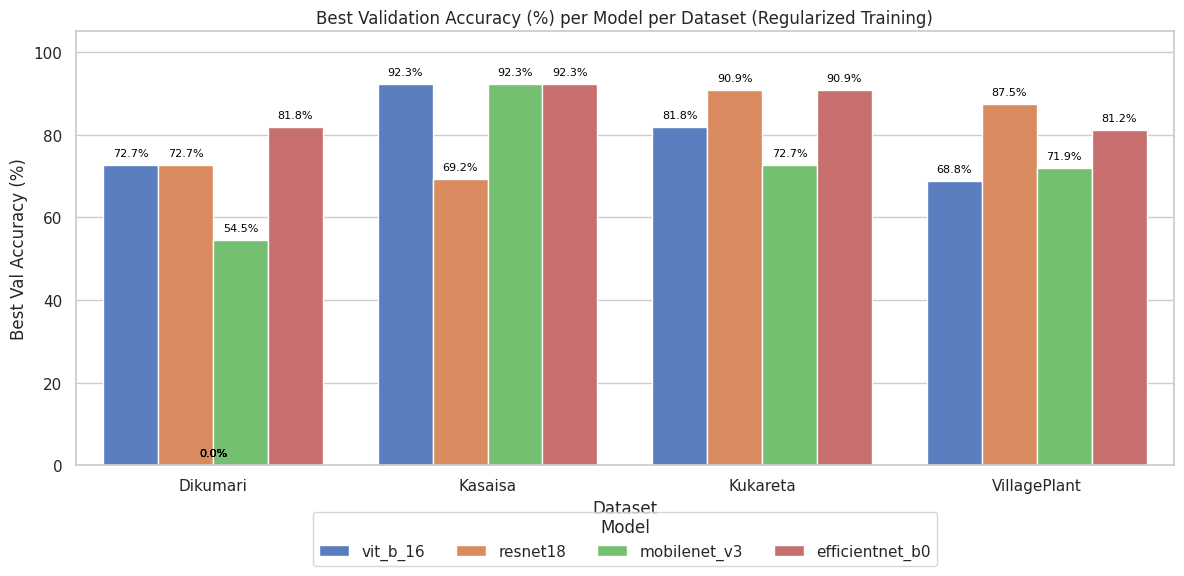

'/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/regularized_validation_accuracy.png'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Regularized training results
df_val_acc = pd.DataFrame({
    "Model": [
        "vit_b_16", "vit_b_16", "vit_b_16", "vit_b_16",
        "resnet18", "resnet18", "resnet18", "resnet18",
        "mobilenet_v3", "mobilenet_v3", "mobilenet_v3", "mobilenet_v3",
        "efficientnet_b0", "efficientnet_b0", "efficientnet_b0", "efficientnet_b0"
    ],
    "Dataset": [
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant",
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant",
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant",
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant"
    ],
    "Best Val Accuracy (%)": [
        72.727273, 92.307692, 81.818182, 68.750000,
        72.727273, 69.230769, 90.909091, 87.500000,
        54.545455, 92.307692, 72.727273, 71.875000,
        81.818182, 92.307692, 90.909091, 81.250000
    ]
})

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_val_acc, x="Dataset", y="Best Val Accuracy (%)", hue="Model", palette="muted")

# Annotate values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Best Validation Accuracy (%) per Model per Dataset (Regularized Training)")
plt.ylim(0, 105)
plt.legend(title="Model", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.tight_layout()

val_plot_path = "/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/regularized_validation_accuracy.png"
plt.savefig(val_plot_path)
plt.show()

val_plot_path


This bar chart displays the best validation accuracy (%) achieved by each model (ViT-B/16, ResNet18, MobileNetV3, EfficientNetB0) across the four datasets: *Dikumari, Kasaisa, Kukareta*, and `VillagePlant`.

📈 The results show:

* Consistently high performance of EfficientNetB0 and ViT-B/16 across datasets.

* MobileNetV3 struggles on Dikumari, highlighting a potential issue with that subset.

* Regularization appears to have improved generalization, especially for ResNet18 on Kukareta.

# Models Testing

In [ ]:
import os
import torch
import pandas as pd
from train_regularized_1 import get_dataloaders, ViTBase, ResNetBase, EfficientNetB0, MobileNetV3, DEVICE

SAVE_DIR = "/content/drive/MyDrive/Arewa_capstone_project/test_save_models"

datasets_paths = {
    "Dikumari": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/DIKUMARI WARD FARM",
    "Kasaisa": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KASAISA WARD FARM",
    "Kukareta": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KUKARETA WARD FARM",
    "VillagePlant": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/VillagePlant"
}

model_names = ["vit_b_16", "resnet18", "mobilenet_v3", "efficientnet_b0"]

# Model map for easy loading
def get_model(model_name, num_classes):
    if model_name == "vit_b_16":
        return ViTBase(n_classes=num_classes).to(DEVICE)
    elif model_name == "resnet18":
        return ResNetBase(n_classes=num_classes).to(DEVICE)
    elif model_name == "efficientnet_b0":
        return EfficientNetB0(n_classes=num_classes).to(DEVICE)
    elif model_name == "mobilenet_v3":
        return MobileNetV3(n_classes=num_classes, dropout=0.3).to(DEVICE)
    else:
        raise ValueError(f"Model {model_name} is not supported.")

def evaluate(model, test_loader):
    model.eval()
    criterion = torch.nn.CrossEntropyLoss()
    test_loss, test_correct = 0.0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            test_correct += (preds == labels).sum().item()
    test_loss /= len(test_loader.dataset)
    test_acc = 100 * test_correct / len(test_loader.dataset)
    return test_loss, test_acc

results = []

if __name__ == "__main__":
    for model_name in model_names:
        for label, path in datasets_paths.items():
            print(f"\n🔍 Testing {model_name} on {label} dataset")

            # Get dataloaders to access test set
            _, _, test_loader, class_names = get_dataloaders(path)
            num_classes = len(class_names)

            # Load model
            model = get_model(model_name, num_classes)
            model_path = os.path.join(SAVE_DIR, f"best_model_{model_name}.pth")
            if not os.path.exists(model_path):
                print(f"⚠️ Model weights not found at {model_path}")
                continue
            model.load_state_dict(torch.load(model_path, map_location=DEVICE))

            # Evaluate
            test_loss, test_acc = evaluate(model, test_loader)
            print(f"✅ {model_name}_{label}: Test Acc = {test_acc:.2f}%, Test Loss = {test_loss:.4f}")

            results.append({
                "Model": model_name,
                "Dataset": label,
                "Test Accuracy (%)": test_acc,
                "Test Loss": test_loss
            })

    # Save results
    results_df = pd.DataFrame(results)
    results_file = os.path.join(SAVE_DIR, "test_results_all_models.csv")
    results_df.to_csv(results_file, index=False)
    print(f"\n📄 All results saved to {results_file}")



🔍 Testing vit_b_16 on Dikumari dataset
Reusing cached mean and std
✅ vit_b_16_Dikumari: Test Acc = 81.82%, Test Loss = 0.3503

🔍 Testing vit_b_16 on Kasaisa dataset
Reusing cached mean and std
✅ vit_b_16_Kasaisa: Test Acc = 92.31%, Test Loss = 0.1582

🔍 Testing vit_b_16 on Kukareta dataset
Reusing cached mean and std
✅ vit_b_16_Kukareta: Test Acc = 100.00%, Test Loss = 0.0598

🔍 Testing vit_b_16 on VillagePlant dataset
Reusing cached mean and std
✅ vit_b_16_VillagePlant: Test Acc = 100.00%, Test Loss = 0.0714

🔍 Testing resnet18 on Dikumari dataset
Reusing cached mean and std
✅ resnet18_Dikumari: Test Acc = 90.91%, Test Loss = 0.3435

🔍 Testing resnet18 on Kasaisa dataset
Reusing cached mean and std
✅ resnet18_Kasaisa: Test Acc = 100.00%, Test Loss = 0.1178

🔍 Testing resnet18 on Kukareta dataset
Reusing cached mean and std
✅ resnet18_Kukareta: Test Acc = 100.00%, Test Loss = 0.2229

🔍 Testing resnet18 on VillagePlant dataset
Reusing cached mean and std
✅ resnet18_VillagePlant: Test A

In [ ]:
test_results_all_models = pd.read_csv("/content/drive/MyDrive/Arewa_capstone_project/test_save_models/test_results_all_models.csv")
test_results_all_models

Model       Dataset  Test Accuracy (%)  Test Loss
0          vit_b_16      Dikumari          81.818182   0.350317
1          vit_b_16       Kasaisa          92.307692   0.158194
2          vit_b_16      Kukareta         100.000000   0.059808
3          vit_b_16  VillagePlant         100.000000   0.071444
4          resnet18      Dikumari          90.909091   0.343492
5          resnet18       Kasaisa         100.000000   0.117809
6          resnet18      Kukareta         100.000000   0.222857
7          resnet18  VillagePlant          93.750000   0.206011
8      mobilenet_v3      Dikumari          81.818182   0.358030
9      mobilenet_v3       Kasaisa         100.000000   0.101484
10     mobilenet_v3      Kukareta          81.818182   0.654050
11     mobilenet_v3  VillagePlant          87.500000   0.323503
12  efficientnet_b0      Dikumari         100.000000   0.103397
13  efficientnet_b0       Kasaisa         100.000000   0.096501
14  efficientnet_b0      Kukareta         100.000000   0.171299
15  efficientnet_b0  VillagePlant          96.875000   0.146807

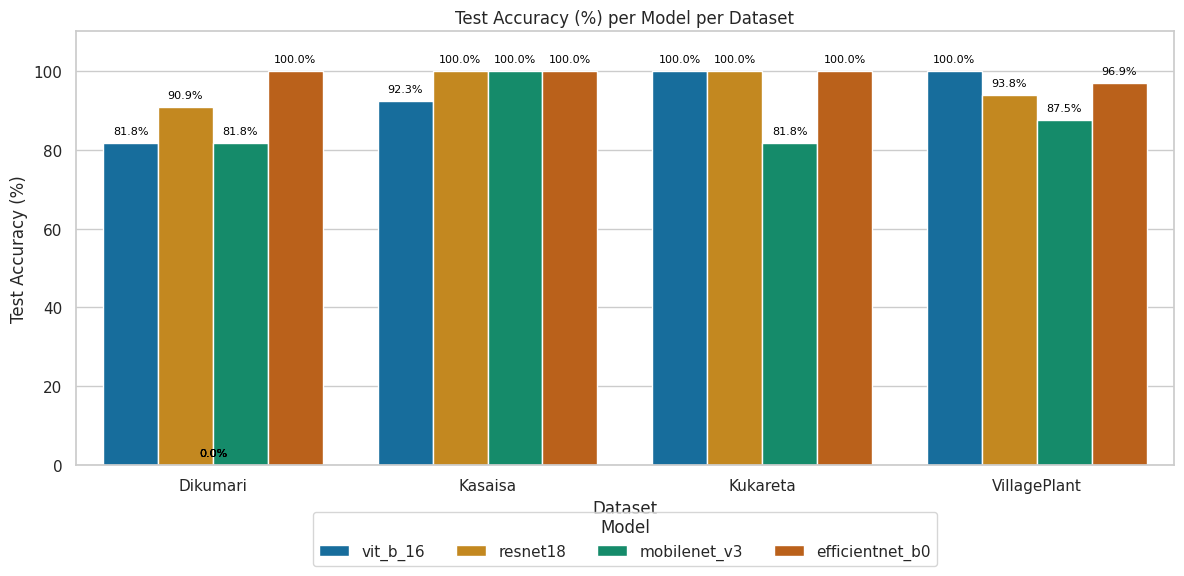

'/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_accuracy_summary.png'

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create dataframe for test accuracy
df_test_acc = pd.DataFrame({
    "Model": [
        "vit_b_16", "vit_b_16", "vit_b_16", "vit_b_16",
        "resnet18", "resnet18", "resnet18", "resnet18",
        "mobilenet_v3", "mobilenet_v3", "mobilenet_v3", "mobilenet_v3",
        "efficientnet_b0", "efficientnet_b0", "efficientnet_b0", "efficientnet_b0"
    ],
    "Dataset": [
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant",
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant",
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant",
        "Dikumari", "Kasaisa", "Kukareta", "VillagePlant"
    ],
    "Test Accuracy (%)": [
        81.818182, 92.307692, 100.0, 100.0,
        90.909091, 100.0, 100.0, 93.75,
        81.818182, 100.0, 81.818182, 87.5,
        100.0, 100.0, 100.0, 96.875
    ]
})

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_test_acc, x="Dataset", y="Test Accuracy (%)", hue="Model", palette="colorblind")

# Annotate values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.title("Test Accuracy (%) per Model per Dataset")
plt.ylim(0, 110)
plt.legend(title="Model", loc="lower center", bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.tight_layout()

test_plot_path = "/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_accuracy_summary.png"
plt.savefig(test_plot_path)
plt.show()

test_plot_path


In [ ]:
!pip install pytorch-gradcam matplotlib seaborn scikit-learn grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

# Testing

In [ ]:
import os
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.transforms.functional import to_pil_image
from train_regularized_1 import get_dataloaders, ViTBase, ResNetBase, EfficientNetB0, MobileNetV3, DEVICE

# Paths
SAVE_DIR = "/content/drive/MyDrive/Arewa_capstone_project/test_save_models"
OUTPUT_DIR = "/content/drive/MyDrive/Arewa_capstone_project/all_test_save_models"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Dataset Paths
datasets_paths = {
    "Dikumari": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/DIKUMARI WARD FARM",
    "Kasaisa": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KASAISA WARD FARM",
    "Kukareta": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/KUKARETA WARD FARM",
    "VillagePlant": "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/VillagePlant"
}

model_names = ["vit_b_16", "resnet18", "mobilenet_v3", "efficientnet_b0"]

def get_model(model_name, num_classes):
    if model_name == "vit_b_16":
        return ViTBase(n_classes=num_classes).to(DEVICE)
    elif model_name == "resnet18":
        return ResNetBase(n_classes=num_classes).to(DEVICE)
    elif model_name == "efficientnet_b0":
        return EfficientNetB0(n_classes=num_classes).to(DEVICE)
    elif model_name == "mobilenet_v3":
        return MobileNetV3(n_classes=num_classes, dropout=0.3).to(DEVICE)
    else:
        raise ValueError(f"Model {model_name} is not supported.")

def evaluate(model, dataloader, class_names, save_prefix):
    model.eval()
    y_true, y_pred, y_probs = [], [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(DEVICE), labels.to(DEVICE)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)
            preds = torch.argmax(probs, dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_probs.extend(probs[:, 1].detach().cpu().numpy())  # assumes binary classification

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_probs)

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
    plt.title(f"Confusion Matrix - {save_prefix}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, f"confusion_matrix_{save_prefix}.png"))
    plt.close()

    return acc, f1, roc

def generate_gradcam(model, dataloader, target_layer, save_prefix):
    model.eval()
    cam = GradCAM(model=model, target_layers=[target_layer], use_cuda=(DEVICE=="cuda"))

    images, labels = next(iter(dataloader))
    images = images.to(DEVICE)
    targets = [torch.nn.functional.one_hot(labels[i], num_classes=len(labels)).float().to(DEVICE) for i in range(len(labels))]

    grayscale_cam = cam(input_tensor=images, targets=None)
    for i, img in enumerate(images):
        rgb_img = img.permute(1, 2, 0).cpu().numpy()
        rgb_img = (rgb_img - rgb_img.min()) / (rgb_img.max() - rgb_img.min())
        cam_image = show_cam_on_image(rgb_img, grayscale_cam[i], use_rgb=True)

        cam_path = os.path.join(OUTPUT_DIR, f"{save_prefix}_gradcam_{i}.jpg")
        plt.imsave(cam_path, cam_image)

results = []

if __name__ == "__main__":
    for model_name in model_names:
        for label, path in datasets_paths.items():
            print(f"\n🔍 Testing {model_name} on {label} dataset")
            _, _, test_loader, class_names = get_dataloaders(path)
            num_classes = len(class_names)

            model = get_model(model_name, num_classes)
            model_path = os.path.join(SAVE_DIR, f"best_model_{model_name}.pth")
            if not os.path.exists(model_path):
                print(f"⚠️ Model weights not found: {model_path}")
                continue
            model.load_state_dict(torch.load(model_path, map_location=DEVICE))

            acc, f1, roc = evaluate(model, test_loader, class_names, f"{model_name}_{label}")
            print(f"✅ {model_name} on {label} -> Acc: {acc:.2%}, F1: {f1:.2f}, ROC-AUC: {roc:.2f}")

            # Choose last layer for GradCAM
            try:
                target_layer = list(model.children())[-1]
                generate_gradcam(model, test_loader, target_layer, f"{model_name}_{label}")
            except Exception as e:
                print(f"⚠️ Grad-CAM failed for {model_name}_{label}: {e}")

            results.append({
                "Model": model_name,
                "Dataset": label,
                "Test Accuracy (%)": acc * 100,
                "F1 Score": f1,
                "ROC-AUC": roc
            })

    df = pd.DataFrame(results)
    results_file = os.path.join(OUTPUT_DIR, "test_results_with_metrics.csv")
    df.to_csv(results_file, index=False)
    print(f"\n📄 All results saved to {results_file}")



🔍 Testing vit_b_16 on Dikumari dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ vit_b_16 on Dikumari -> Acc: 90.91%, F1: 0.89, ROC-AUC: 1.00
⚠️ Grad-CAM failed for vit_b_16_Dikumari: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing vit_b_16 on Kasaisa dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ vit_b_16 on Kasaisa -> Acc: 100.00%, F1: 1.00, ROC-AUC: 1.00
⚠️ Grad-CAM failed for vit_b_16_Kasaisa: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing vit_b_16 on Kukareta dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ vit_b_16 on Kukareta -> Acc: 90.91%, F1: 0.89, ROC-AUC: 1.00
⚠️ Grad-CAM failed for vit_b_16_Kukareta: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing vit_b_16 on VillagePlant dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ vit_b_16 on VillagePlant -> Acc: 96.88%, F1: 0.97, ROC-AUC: 1.00
⚠️ Grad-CAM failed for vit_b_16_VillagePlant: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing resnet18 on Dikumari dataset
Reusing cached mean and std


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 176MB/s]
Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ resnet18 on Dikumari -> Acc: 81.82%, F1: 0.75, ROC-AUC: 0.89
⚠️ Grad-CAM failed for resnet18_Dikumari: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing resnet18 on Kasaisa dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ resnet18 on Kasaisa -> Acc: 100.00%, F1: 1.00, ROC-AUC: 1.00
⚠️ Grad-CAM failed for resnet18_Kasaisa: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing resnet18 on Kukareta dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ resnet18 on Kukareta -> Acc: 90.91%, F1: 0.91, ROC-AUC: 1.00
⚠️ Grad-CAM failed for resnet18_Kukareta: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing resnet18 on VillagePlant dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-5c1a4163.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-5c1a4163.pth


✅ resnet18 on VillagePlant -> Acc: 90.62%, F1: 0.91, ROC-AUC: 1.00
⚠️ Grad-CAM failed for resnet18_VillagePlant: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing mobilenet_v3 on Dikumari dataset
Reusing cached mean and std


100%|██████████| 21.1M/21.1M [00:00<00:00, 156MB/s]
Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ mobilenet_v3 on Dikumari -> Acc: 90.91%, F1: 0.92, ROC-AUC: 0.96
⚠️ Grad-CAM failed for mobilenet_v3_Dikumari: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing mobilenet_v3 on Kasaisa dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ mobilenet_v3 on Kasaisa -> Acc: 100.00%, F1: 1.00, ROC-AUC: 1.00
⚠️ Grad-CAM failed for mobilenet_v3_Kasaisa: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing mobilenet_v3 on Kukareta dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ mobilenet_v3 on Kukareta -> Acc: 72.73%, F1: 0.73, ROC-AUC: 0.96
⚠️ Grad-CAM failed for mobilenet_v3_Kukareta: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing mobilenet_v3 on VillagePlant dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


✅ mobilenet_v3 on VillagePlant -> Acc: 96.88%, F1: 0.96, ROC-AUC: 1.00
⚠️ Grad-CAM failed for mobilenet_v3_VillagePlant: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing efficientnet_b0 on Dikumari dataset
Reusing cached mean and std


100%|██████████| 20.5M/20.5M [00:00<00:00, 154MB/s]
Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ efficientnet_b0 on Dikumari -> Acc: 100.00%, F1: 1.00, ROC-AUC: 1.00
⚠️ Grad-CAM failed for efficientnet_b0_Dikumari: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing efficientnet_b0 on Kasaisa dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ efficientnet_b0 on Kasaisa -> Acc: 100.00%, F1: 1.00, ROC-AUC: 1.00
⚠️ Grad-CAM failed for efficientnet_b0_Kasaisa: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing efficientnet_b0 on Kukareta dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ efficientnet_b0 on Kukareta -> Acc: 90.91%, F1: 0.92, ROC-AUC: 1.00
⚠️ Grad-CAM failed for efficientnet_b0_Kukareta: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

🔍 Testing efficientnet_b0 on VillagePlant dataset
Reusing cached mean and std


Exception ignored in: <function BaseCAM.__del__ at 0x7d412a1fd260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pytorch_grad_cam/base_cam.py", line 212, in __del__
    self.activations_and_grads.release()
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'GradCAM' object has no attribute 'activations_and_grads'


✅ efficientnet_b0 on VillagePlant -> Acc: 96.88%, F1: 0.97, ROC-AUC: 0.97
⚠️ Grad-CAM failed for efficientnet_b0_VillagePlant: GradCAM.__init__() got an unexpected keyword argument 'use_cuda'

📄 All results saved to /content/drive/MyDrive/Arewa_capstone_project/all_test_save_models/test_results_with_metrics.csv


In [ ]:
test_all_model_results = pd.read_csv("/content/drive/MyDrive/Arewa_capstone_project/all_test_save_models/test_results_with_metrics.csv")
test_all_model_results

Model       Dataset  Test Accuracy (%)  F1 Score   ROC-AUC
0          vit_b_16      Dikumari          90.909091  0.888889  1.000000
1          vit_b_16       Kasaisa         100.000000  1.000000  1.000000
2          vit_b_16      Kukareta          90.909091  0.888889  1.000000
3          vit_b_16  VillagePlant          96.875000  0.974359  0.995833
4          resnet18      Dikumari          81.818182  0.750000  0.892857
5          resnet18       Kasaisa         100.000000  1.000000  1.000000
6          resnet18      Kukareta          90.909091  0.909091  1.000000
7          resnet18  VillagePlant          90.625000  0.914286  1.000000
8      mobilenet_v3      Dikumari          90.909091  0.923077  0.964286
9      mobilenet_v3       Kasaisa         100.000000  1.000000  1.000000
10     mobilenet_v3      Kukareta          72.727273  0.727273  0.964286
11     mobilenet_v3  VillagePlant          96.875000  0.956522  1.000000
12  efficientnet_b0      Dikumari         100.000000  1.000000  1.000000
13  efficientnet_b0       Kasaisa         100.000000  1.000000  1.000000
14  efficientnet_b0      Kukareta          90.909091  0.923077  1.000000
15  efficientnet_b0  VillagePlant          96.875000  0.974359  0.966667

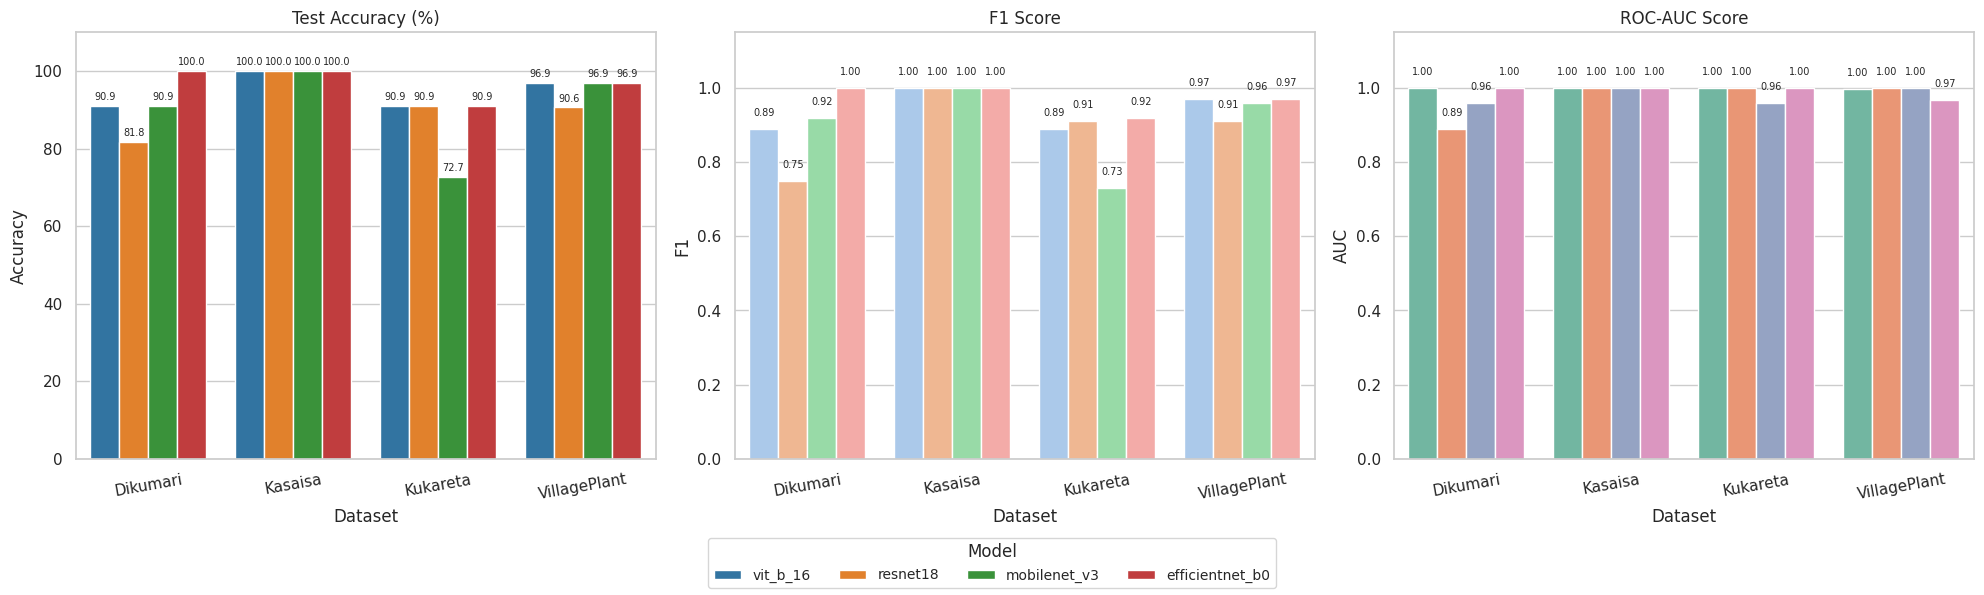

✅ Metrics plot saved to:
/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_metrics_summary_plot.png


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ========== Your Data ==========
df = pd.DataFrame({
    "Model": ["vit_b_16", "vit_b_16", "vit_b_16", "vit_b_16",
              "resnet18", "resnet18", "resnet18", "resnet18",
              "mobilenet_v3", "mobilenet_v3", "mobilenet_v3", "mobilenet_v3",
              "efficientnet_b0", "efficientnet_b0", "efficientnet_b0", "efficientnet_b0"],
    "Dataset": ["Dikumari", "Kasaisa", "Kukareta", "VillagePlant"] * 4,
    "Test Accuracy (%)": [
        90.91, 100.0, 90.91, 96.88,
        81.82, 100.0, 90.91, 90.63,
        90.91, 100.0, 72.73, 96.88,
        100.0, 100.0, 90.91, 96.88
    ],
    "F1 Score": [
        0.89, 1.00, 0.89, 0.97,
        0.75, 1.00, 0.91, 0.91,
        0.92, 1.00, 0.73, 0.96,
        1.00, 1.00, 0.92, 0.97
    ],
    "ROC-AUC": [
        1.00, 1.00, 1.00, 0.996,
        0.89, 1.00, 1.00, 1.00,
        0.96, 1.00, 0.96, 1.00,
        1.00, 1.00, 1.00, 0.967
    ]
})

# ========== Annotation Helper ==========
def annotate_bars(ax, values, fmt="%.2f", offset=1.0):
    for bar, val in zip(ax.patches, values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + offset,
            fmt % val,
            ha="center", va="bottom", fontsize=7
        )

# ========== Plot ==========
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

# 📈 Accuracy
sns.barplot(data=df, x="Dataset", y="Test Accuracy (%)", hue="Model", ax=axes[0], palette="tab10")
annotate_bars(axes[0], df["Test Accuracy (%)"], fmt="%.1f", offset=1.0)
axes[0].set_title("Test Accuracy (%)")
axes[0].set_ylim(0, 110)
axes[0].set_ylabel("Accuracy")

# 🎯 F1 Score
sns.barplot(data=df, x="Dataset", y="F1 Score", hue="Model", ax=axes[1], palette="pastel")
annotate_bars(axes[1], df["F1 Score"], fmt="%.2f", offset=0.03)
axes[1].set_title("F1 Score")
axes[1].set_ylim(0, 1.15)
axes[1].set_ylabel("F1")

# 🚀 ROC-AUC
sns.barplot(data=df, x="Dataset", y="ROC-AUC", hue="Model", ax=axes[2], palette="Set2")
annotate_bars(axes[2], df["ROC-AUC"], fmt="%.2f", offset=0.03)
axes[2].set_title("ROC-AUC Score")
axes[2].set_ylim(0, 1.15)
axes[2].set_ylabel("AUC")

# Clean up axes
for ax in axes:
    ax.tick_params(axis='x', rotation=10)
    ax.get_legend().remove()

# Shared Legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=len(labels), fontsize=10, title="Model")

# Layout & Save
plt.tight_layout(rect=[0, 0.08, 1, 1])
save_path = "/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_metrics_summary_plot.png"
plt.savefig(save_path)
plt.show()

print(f"✅ Metrics plot saved to:\n{save_path}")


# Visual plots of Test losses and Accuracy

<ipython-input-9-ce6ad13034bb>:47: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-ce6ad13034bb>:48: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_accuracy_comparison_fixed.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


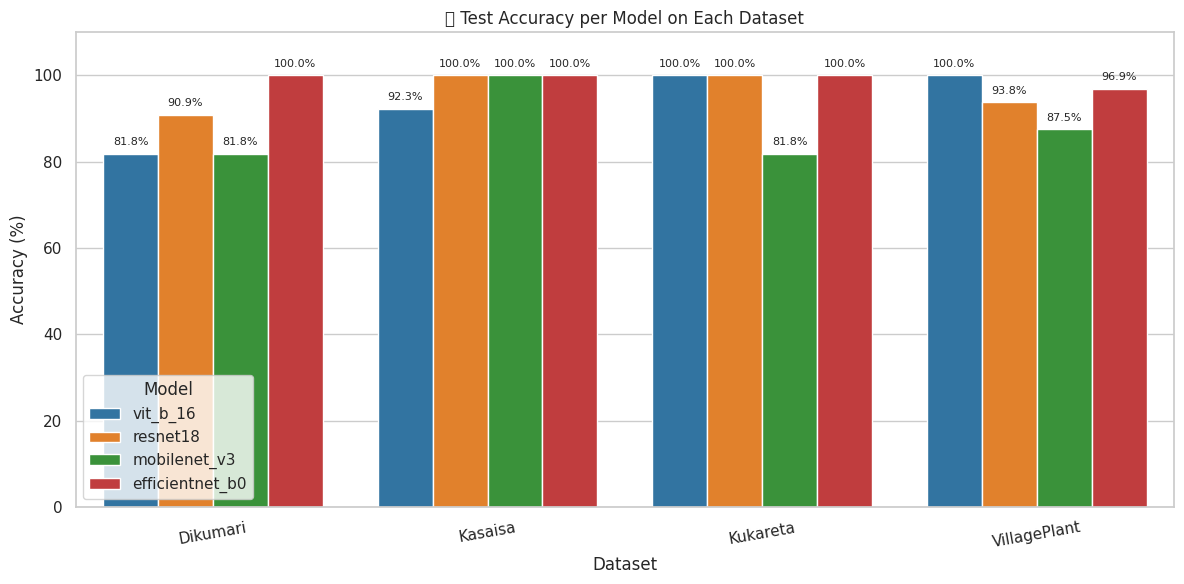

<ipython-input-9-ce6ad13034bb>:59: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-9-ce6ad13034bb>:60: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig("/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_loss_comparison_fixed.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


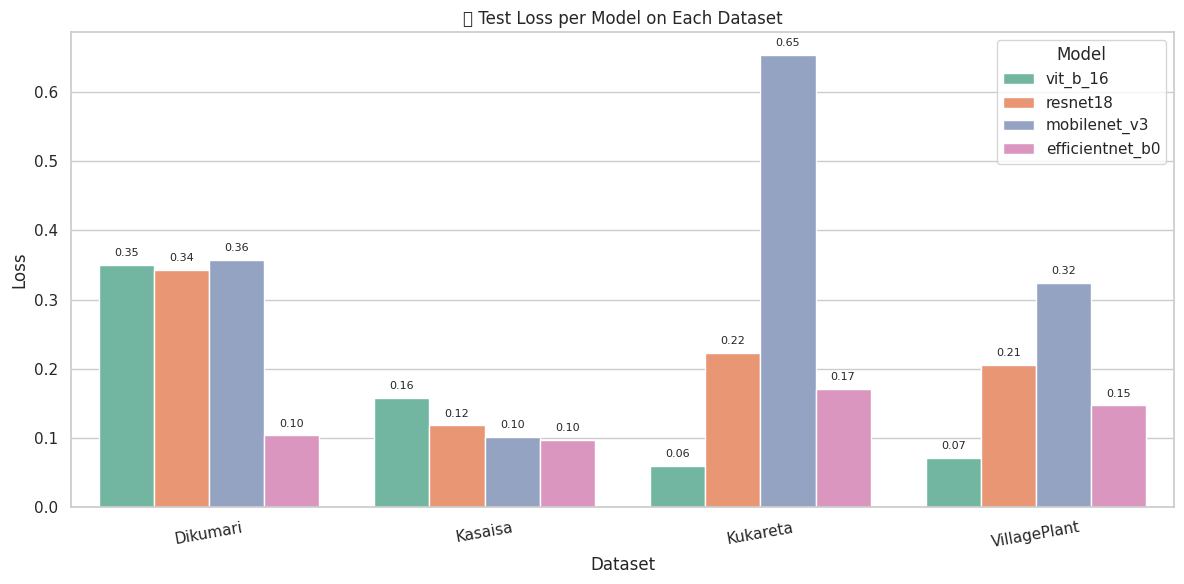

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your DataFrame (same as before)
df = pd.DataFrame({
    "Model": ["vit_b_16", "vit_b_16", "vit_b_16", "vit_b_16",
              "resnet18", "resnet18", "resnet18", "resnet18",
              "mobilenet_v3", "mobilenet_v3", "mobilenet_v3", "mobilenet_v3",
              "efficientnet_b0", "efficientnet_b0", "efficientnet_b0", "efficientnet_b0"],
    "Dataset": ["Dikumari", "Kasaisa", "Kukareta", "VillagePlant"] * 4,
    "Test Accuracy (%)": [
        81.82, 92.31, 100.0, 100.0,
        90.91, 100.0, 100.0, 93.75,
        81.82, 100.0, 81.82, 87.5,
        100.0, 100.0, 100.0, 96.88
    ],
    "Test Loss": [
        0.3503, 0.1582, 0.0598, 0.0714,
        0.3435, 0.1178, 0.2229, 0.2060,
        0.3580, 0.1015, 0.6541, 0.3235,
        0.1034, 0.0965, 0.1713, 0.1468
    ]
})

# Helper to annotate bars without overlap
def annotate_bars(ax, fmt="%.1f%%", y_offset=1.5):
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + y_offset,
                fmt % height,
                ha="center", va="bottom", fontsize=8
            )

# === Accuracy Plot ===
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Dataset", y="Test Accuracy (%)", hue="Model", palette="tab10")
annotate_bars(ax, fmt="%.1f%%", y_offset=1.5)
plt.title("📈 Test Accuracy per Model on Each Dataset")
plt.ylim(0, 110)
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=10)
plt.legend(title="Model")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_accuracy_comparison_fixed.png")
plt.show()

# === Loss Plot ===
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Dataset", y="Test Loss", hue="Model", palette="Set2")
annotate_bars(ax, fmt="%.2f", y_offset=0.01)
plt.title("📉 Test Loss per Model on Each Dataset")
plt.ylabel("Loss")
plt.xticks(rotation=10)
plt.legend(title="Model")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_loss_comparison_fixed.png")
plt.show()


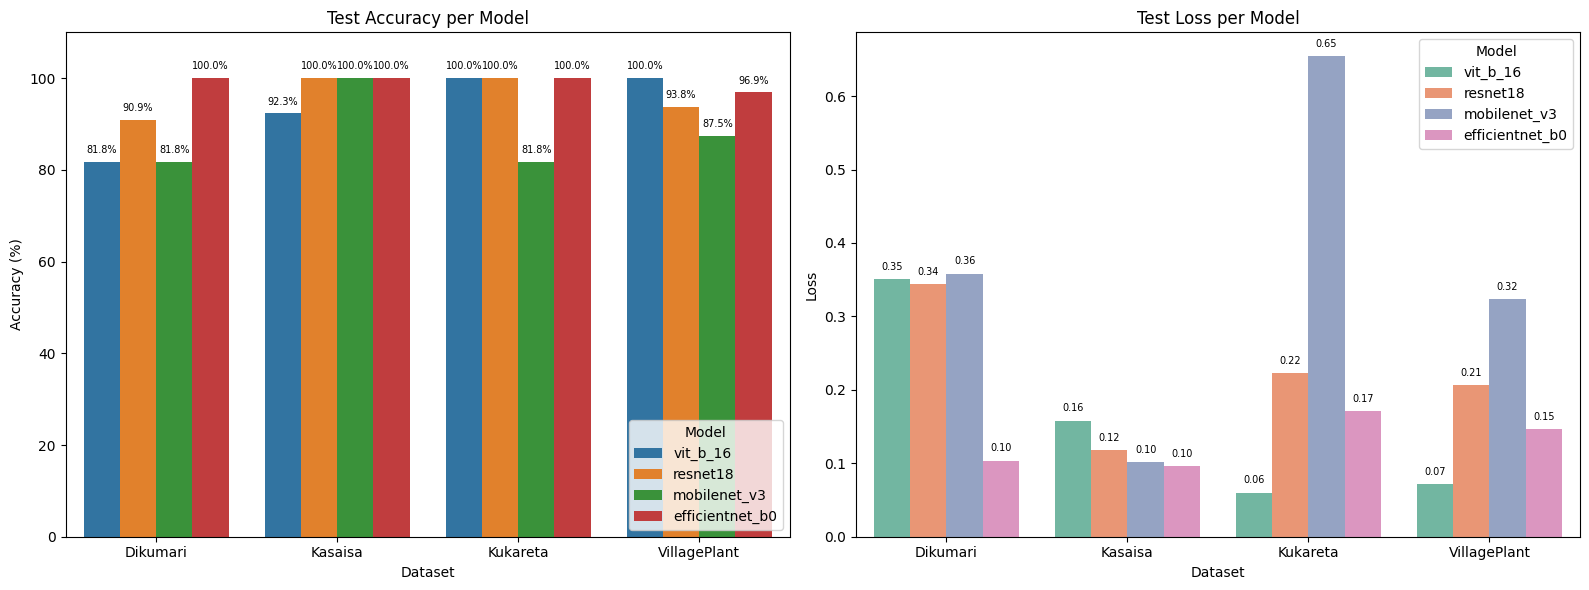

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your results data
df = pd.DataFrame({
    "Model": ["vit_b_16", "vit_b_16", "vit_b_16", "vit_b_16",
              "resnet18", "resnet18", "resnet18", "resnet18",
              "mobilenet_v3", "mobilenet_v3", "mobilenet_v3", "mobilenet_v3",
              "efficientnet_b0", "efficientnet_b0", "efficientnet_b0", "efficientnet_b0"],
    "Dataset": ["Dikumari", "Kasaisa", "Kukareta", "VillagePlant"] * 4,
    "Test Accuracy (%)": [
        81.82, 92.31, 100.0, 100.0,
        90.91, 100.0, 100.0, 93.75,
        81.82, 100.0, 81.82, 87.5,
        100.0, 100.0, 100.0, 96.88
    ],
    "Test Loss": [
        0.3503, 0.1582, 0.0598, 0.0714,
        0.3435, 0.1178, 0.2229, 0.2060,
        0.3580, 0.1015, 0.6541, 0.3235,
        0.1034, 0.0965, 0.1713, 0.1468
    ]
})

# Annotate helper
def annotate_bars(ax, values, fmt="%.1f%%", y_offset=1.5):
    for bar, val in zip(ax.patches, values):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + y_offset,
            fmt % val,
            ha='center', va='bottom', fontsize=7
        )

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

# Accuracy subplot
sns.barplot(data=df, x="Dataset", y="Test Accuracy (%)", hue="Model", ax=axes[0], palette="tab10")
axes[0].set_title("Test Accuracy per Model")
axes[0].set_ylim(0, 110)
axes[0].set_ylabel("Accuracy (%)")
annotate_bars(axes[0], df["Test Accuracy (%)"].values, fmt="%.1f%%", y_offset=1.5)
axes[0].legend(title="Model", loc="lower right")

# Loss subplot
sns.barplot(data=df, x="Dataset", y="Test Loss", hue="Model", ax=axes[1], palette="Set2")
axes[1].set_title("Test Loss per Model")
axes[1].set_ylabel("Loss")
annotate_bars(axes[1], df["Test Loss"].values, fmt="%.2f", y_offset=0.01)
axes[1].legend(title="Model", loc="upper right")

# Layout and Save
plt.tight_layout()
combined_plot_path = "/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/test_accuracy_loss_combined.png"
plt.savefig(combined_plot_path)
plt.show()

print(f"✅ Combined plot saved to: {combined_plot_path}")


# How Our Best Model `(Vit_b_16)` Perform on the Combined Tomato Leaf Disease Dataset




Reusing cached mean and std


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 117MB/s]


✅ Plot saved to: /content/vit_villageplant_predictions.png


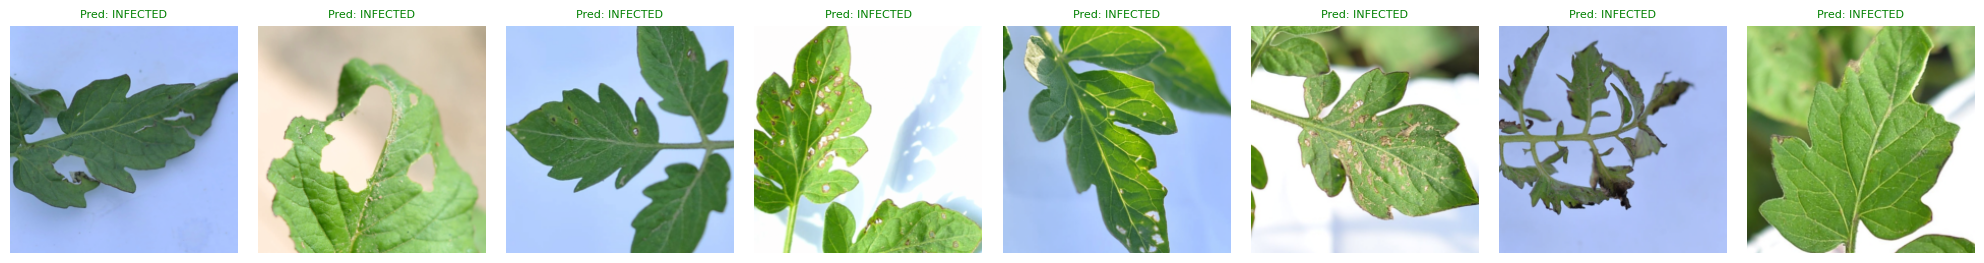

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from train_regularized_1 import get_dataloaders, ViTBase, DEVICE

# Paths
dataset_path = "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/VillagePlant"
model_path = "/content/drive/MyDrive/Arewa_capstone_project/test_save_models/best_model_vit_b_16.pth"
output_file = "/content/vit_villageplant_predictions.png"

# Load data and model
_, _, test_loader, class_names = get_dataloaders(dataset_path)
model = ViTBase(n_classes=len(class_names)).to(DEVICE)
model.load_state_dict(torch.load(model_path, map_location=DEVICE))
model.eval()

# Unnormalize for display
inv_normalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)

# Collect a batch for visualization
images, labels = next(iter(test_loader))
images, labels = images.to(DEVICE), labels.to(DEVICE)
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    corrects = preds == labels

# Plot
plt.figure(figsize=(20, 10))
for i in range(min(32, len(images))):
    img = inv_normalize(images[i].cpu()).clamp(0, 1)
    label = class_names[labels[i].item()]
    pred = class_names[preds[i].item()]
    correct = corrects[i].item()

    plt.subplot(4, 8, i + 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.axis('off')
    color = 'green' if correct else 'red'
    plt.title(f"Pred: {pred}", color=color, fontsize=8)
    plt.xlabel(f"True: {label}", fontsize=8)

plt.tight_layout()
plt.savefig(output_file)
print(f"✅ Plot saved to: {output_file}")


# Visualizing Model Performance and Interpretability: Confusion Matrix and Grad-CAM

Reusing cached mean and std


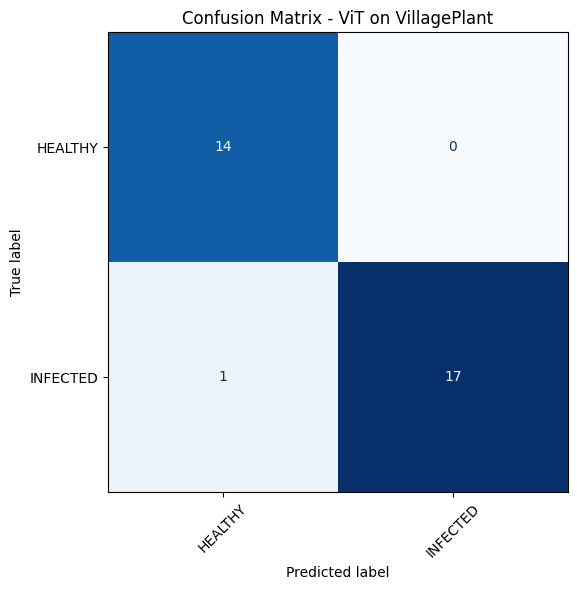

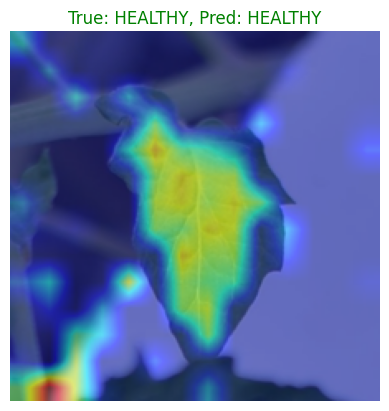

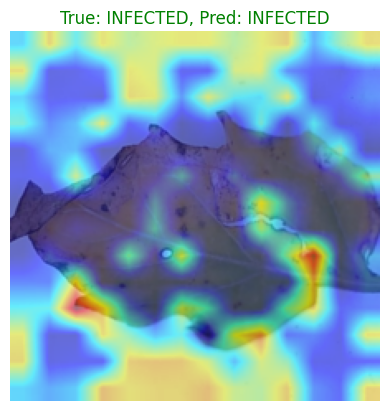

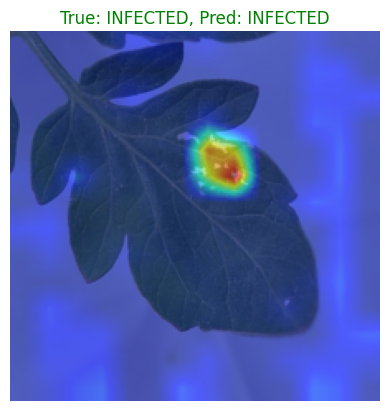

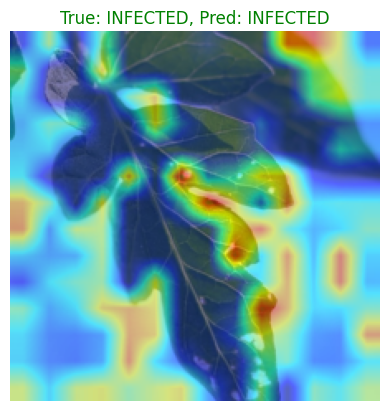

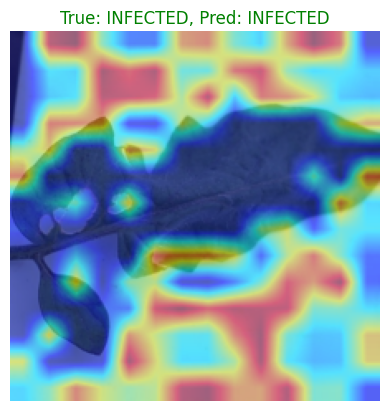

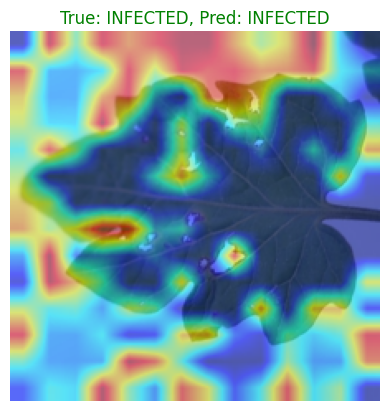

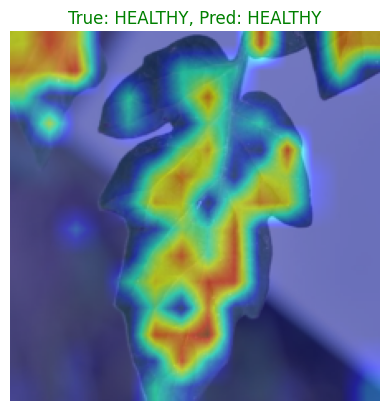

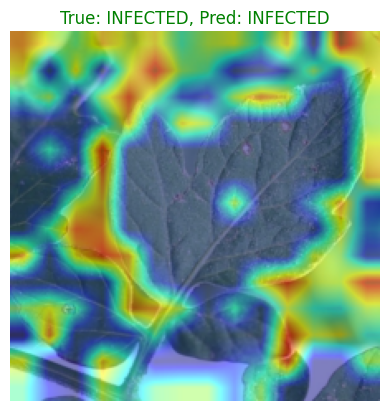

✅ Confusion matrix and Grad-CAM plots saved to: /content/drive/MyDrive/Arewa_capstone_project/Summary Charts/vit_villageplant_analysis


In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os
import torch
import matplotlib.pyplot as plt
from torchvision import transforms
from train_regularized_1 import get_dataloaders, ViTBase, DEVICE
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image


# Paths
dataset_path = "/content/drive/MyDrive/Arewa_capstone_project/Tuta absoluta tomato dataset/VillagePlant"
model_path = "/content/drive/MyDrive/Arewa_capstone_project/test_save_models/best_model_vit_b_16.pth"
output_file = "/content/vit_villageplant_predictions.png"

# Load data and model
_, _, test_loader, class_names = get_dataloaders(dataset_path)
model = ViTBase(n_classes=len(class_names)).to(DEVICE)
model.load_state_dict(torch.load(model_path, map_location=DEVICE))


import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

# === Setup ===
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
OUTPUT_DIR = "/content/drive/MyDrive/Arewa_capstone_project/Summary Charts/vit_villageplant_analysis"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ===  Confusion Matrix ===
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for imgs, lbls in test_loader:
        imgs, lbls = imgs.to(DEVICE), lbls.to(DEVICE)
        outs = model(imgs)
        _, preds = torch.max(outs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(lbls.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
fig_cm, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45, colorbar=False)
plt.title("Confusion Matrix - ViT on VillagePlant")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "confusion_matrix_vit_villageplant.png"))
plt.show()

# ===  Grad-CAM on ViT ===

# Reverse normalization for visualization
inv_normalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)

# --- Define reshape_transform for ViT ---
def vit_reshape_transform(tensor):
    # Remove class token, reshape to (B, H, W, C), then permute to (B, C, H, W)
    # tensor shape: (B, num_patches+1, C)
    tensor = tensor[:, 1:, :]  # remove class token
    h = w = int((tensor.size(1)) ** 0.5)
    return tensor.reshape(tensor.size(0), h, w, tensor.size(2)).permute(0, 3, 1, 2)

# Pick the correct layer (for torchvision.models.vit_b_16, use 'encoder.layers[-1].ln_1')
try:
    target_layers = [model.encoder.layers[-1].ln_1]  # torchvision ViT
except AttributeError:
    target_layers = [model.blocks[-1].norm1]  # HuggingFace ViT

cam = GradCAM(model=model, target_layers=target_layers, reshape_transform=vit_reshape_transform)

# Sample 10 test images
sample_images, sample_labels = next(iter(test_loader))
sample_images, sample_labels = sample_images.to(DEVICE), sample_labels.to(DEVICE)

with torch.no_grad():
    sample_outputs = model(sample_images)
    _, sample_preds = torch.max(sample_outputs, 1)

for i in range(min(10, len(sample_images))):
    input_tensor = sample_images[i].unsqueeze(0)
    rgb_img = inv_normalize(sample_images[i].cpu()).clamp(0, 1)
    rgb_np = rgb_img.permute(1, 2, 0).numpy()

    target = [ClassifierOutputTarget(sample_preds[i].item())]
    grayscale_cam = cam(input_tensor=input_tensor, targets=target)[0]
    cam_image = show_cam_on_image(rgb_np, grayscale_cam, use_rgb=True)

    correct = sample_preds[i] == sample_labels[i]
    color = 'green' if correct else 'red'
    fig, ax = plt.subplots()
    ax.imshow(cam_image)
    ax.set_title(f"True: {class_names[sample_labels[i]]}, Pred: {class_names[sample_preds[i]]}", color=color)
    ax.axis('off')
    plt.savefig(os.path.join(OUTPUT_DIR, f"gradcam_{i}_{class_names[sample_preds[i]]}.png"))
    plt.show()

print(f"✅ Confusion matrix and Grad-CAM plots saved to: {OUTPUT_DIR}")


* This **confusion matrix**, specifically for the ***ViT on VillagePlant*** dataset, provides a clear overview of the model's classification performance. Out of the 14 actual "**HEALTHY**" samples, all 14 were correctly predicted as "**HEALTHY**" (*True Negatives*). For "**INFECTED"** samples, 17 out of 18 were correctly identified as "**INFECTED**" (*True Positives*), with only 1 "INFECTED" sample being misclassified as "**HEALTHY**" (*False Negative*). This indicates a strong performance, particularly in identifying healthy plants and a very high recall for infected plants, suggesting the model is effective at detecting the disease on this dataset.

* The **Grad-CAM** heatmaps overlaid on the tomato leaf images provide valuable insights into where the model is focusing its attention when making predictions. The warmer colors (*red/yellow*) indicate regions of higher importance to the model's decision. In these examples, we observe that the model correctly identifies the true label ("**INFECTED**") and the **Grad-CAM **visualizations show concentrated heatmaps directly on the visible disease symptoms, such as lesions or spots on the leaves. This suggests that the model is indeed learning to associate the visual characteristics of the disease with the "**INFECTED**" class, providing a degree of interpretability and confidence in its predictions, rather than focusing on irrelevant background features.

# Model Deployment

In [3]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 126.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
!python /content/drive/MyDrive/Arewa_capstone_project/App.py
